In this Notebook:
--

- Train-Test Splitting
- Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats

df = pd.read_csv('house_data_for_modeling.csv')

In [2]:
df.head()

,Unnamed: 0,price,has_waterfront,sqft_above,has_basement,sqft_living15,home_age,living_lot_ratio,zip_98002,zip_98003,...,bwr_5.5,bwr_5.75,bwr_6.0,bwr_6.25,bwr_6.5,bwr_6.75,bwr_7.5,bwr_7.75,bwr_8.0,bwr_9.0
0,0,221900.0,0,1180,0,1340,65,0.208850,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,538000.0,0,2170,1,1690,69,0.354874,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,180000.0,0,770,0,2720,87,0.077000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,604000.0,0,1050,1,1360,55,0.392000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,510000.0,0,1680,0,1800,33,0.207921,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Dropping the Unnamed column
df = df.drop(columns=['Unnamed: 0'])

In [4]:
df.head()

,price,has_waterfront,sqft_above,has_basement,sqft_living15,home_age,living_lot_ratio,zip_98002,zip_98003,zip_98004,...,bwr_5.5,bwr_5.75,bwr_6.0,bwr_6.25,bwr_6.5,bwr_6.75,bwr_7.5,bwr_7.75,bwr_8.0,bwr_9.0
0,221900.0,0,1180,0,1340,65,0.208850,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,0,2170,1,1690,69,0.354874,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,0,770,0,2720,87,0.077000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0,1050,1,1360,55,0.392000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,0,1680,0,1800,33,0.207921,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Splitting the dataset into train-test

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [12]:
formula = 'price ~ home_age+sqft_living15+sqft_above+living_lot_ratio+has_waterfront'
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     4037.
Date:                Wed, 28 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:59:12   Log-Likelihood:            -2.3913e+05
No. Observations:               17276   AIC:                         4.783e+05
Df Residuals:                   17270   BIC:                         4.783e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -4.648e+05   9096.228    -51.093      0.000   -4.83e+05   -4.47e+05
home_age          3793.7472     74.222     51.114      0.000    3648.265    3939.229
sqft_living15      179.5408      4.111     43.674      0.000     171.483     187.599
sqft_above         203.9384      3.501     58.246      0.000     197.075     210.801
living_lot_ratio  2.828e+05   7402.473     38.197      0.000    2.68e+05    2.97e+05
has_waterfront    8.983e+05   2.27e+04     39.536      0.000    8.54e+05    9.43e+05
==============================================================================
Omnibus:                    13795.955   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1039083.581
Skew:                           3.305   Prob(JB):                         0.00
Kurtosis:                      40.414   Cond. No.                     3.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Checking on all columns in the dataset

cols = []
for i in df.columns:
    if i != 'price':
        cols.append(i)
        
#print(cols)

In [17]:
# Running OLS model on the entire dataset
outcome = 'price'
predictors = train.drop('price',axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [18]:
#model = ols(formula=formula, data=train).fit()
#model.summary()

In [19]:
# Changing '.' to '_' so the model can be done successfully
df.columns = df.columns.str.replace(r"[.]", "_")

In [20]:
train.columns = train.columns.str.replace(r"[.]", "_")
test.columns = test.columns.str.replace(r"[.]", "_")

Note Stop:
--

Because there are so many variables, I'm going to run the variables through the model according to their segment. Hopefully, I'll be able to pull out the variables to focus on within each segment and then combine these to make one reasonable collection of variables to feed into the model.

In [61]:
# Organizing variables in such a way to investigate which ones are "best" for the model.

key_vars = ['sqft_living15','has_basement','living_lot_ratio','home_age','has_waterfront','sqft_above']

bathrooms = [i for i in train.columns if 'baths' in i]
bedrooms = [i for i in train.columns if 'beds' in i]
continuous_vars = ['sqft_living15','sqft_above','home_age','living_lot_ratio']
zippies = [i for i in train.columns if 'zip' in i]
baths_with_reno = [i for i in train.columns if 'bwr' in i]
floors = [i for i in train.columns if 'floors' in i]

combos = bathrooms+bedrooms+continuous_vars+zippies

In [62]:
outcome = 'price'
predictors = train.drop('price',axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [24]:
#model = ols(formula=formula, data=train).fit()
#model.summary()

In [48]:
# Correct mistake of adding zipcode dummy variables twice

to_drop = [i for i in df.iloc[:,76:145]]
#to_drop

In [52]:
#df = df.drop(to_drop, axis=1)

In [53]:
df.head()

,price,has_waterfront,sqft_above,has_basement,sqft_living15,home_age,living_lot_ratio,zip_98002,zip_98003,zip_98004,...,bwr_5_5,bwr_5_75,bwr_6_0,bwr_6_25,bwr_6_5,bwr_6_75,bwr_7_5,bwr_7_75,bwr_8_0,bwr_9_0
0,221900.0,0,1180,0,1340,65,0.208850,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,0,2170,1,1690,69,0.354874,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,0,770,0,2720,87,0.077000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0,1050,1,1360,55,0.392000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,0,1680,0,1800,33,0.207921,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Checking on all columns in the dataset to make sure the 2nd set of zipcode variables are removed

cols = []
for i in df.columns:
    if i != 'price':
        cols.append(i)
        
#print(cols)

In [56]:
# Resetting the train-test splitting
train, test = train_test_split(df, test_size=0.2)

In [59]:
# Running model with all variables incorporated, again
outcome = 'price'
predictors = train.drop('price',axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [58]:
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     500.2
Date:                Wed, 28 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:18:08   Log-Likelihood:            -2.3203e+05
No. Observations:               17276   AIC:                         4.643e+05
Df Residuals:                   17138   BIC:                         4.654e+05
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.607e+05   8.44e+04     -3.089      0.002   -4.26e+05   -9.53e+04
has_waterfront    8.138e+05   1.62e+04     50.226      0.000    7.82e+05    8.46e+05
sqft_above         206.4688      3.368     61.304      0.000     199.867     213.070
has_basement       9.21e+04   3554.150     25.913      0.000    8.51e+04    9.91e+04
sqft_living15       85.4519      3.169     26.968      0.000      79.241      91.663
home_age           198.0654     77.734      2.548      0.011      45.698     350.433
living_lot_ratio -8.247e+04   7794.683    -10.581      0.000   -9.78e+04   -6.72e+04
zip_98002           2.1e+04   1.68e+04      1.249      0.212    -1.2e+04    5.39e+04
zip_98003         3163.9780    1.5e+04      0.212      0.832   -2.61e+04    3.25e+04
zip_98004         8.091e+05   1.47e+04     55.219      0.000     7.8e+05    8.38e+05
zip_98005         3.175e+05   1.74e+04     18.207      0.000    2.83e+05    3.52e+05
zip_98006         3.122e+05   1.32e+04     23.571      0.000    2.86e+05    3.38e+05
zip_98007         2.716e+05   1.88e+04     14.441      0.000    2.35e+05    3.08e+05
zip_98008          2.93e+05    1.5e+04     19.469      0.000    2.63e+05    3.22e+05
zip_98010         5.995e+04   2.15e+04      2.791      0.005    1.78e+04    1.02e+05
zip_98011         1.176e+05   1.68e+04      6.990      0.000    8.47e+04    1.51e+05
zip_98014         9.368e+04   1.93e+04      4.847      0.000    5.58e+04    1.32e+05
zip_98019         6.954e+04   1.71e+04      4.061      0.000     3.6e+04    1.03e+05
zip_98022         2.744e+04   1.56e+04      1.760      0.078   -3112.094     5.8e+04
zip_98023        -3.076e+04   1.31e+04     -2.353      0.019   -5.64e+04   -5132.515
zip_98024         1.213e+05   2.27e+04      5.348      0.000    7.68e+04    1.66e+05
zip_98027         1.775e+05   1.37e+04     12.941      0.000    1.51e+05    2.04e+05
zip_98028         1.282e+05    1.5e+04      8.569      0.000    9.89e+04    1.58e+05
zip_98029         2.448e+05   1.47e+04     16.708      0.000    2.16e+05    2.74e+05
zip_98030          -78.3431   1.54e+04     -0.005      0.996   -3.03e+04    3.01e+04
zip_98031         1.451e+04    1.5e+04      0.968      0.333   -1.49e+04    4.39e+04
zip_98032         1.549e+04   1.89e+04      0.820      0.412   -2.15e+04    5.25e+04
zip_98033         3.836e+05   1.34e+04     28.542      0.000    3.57e+05     4.1e+05
zip_98034          2.14e+05   1.28e+04     16.674      0.000    1.89e+05    2.39e+05
zip_98038           2.1e+04   1.27e+04      1.658      0.097   -3826.894    4.58e+04
zip_98039         1.228e+06   2.85e+04     43.098      0.000    1.17e+06    1.28e+06
zip_98040          5.36e+05   1.54e+04     34.869      0.000    5.06e+05    5.66e+05
zip_98042         4094.6223   1.29e+04      0.317      0.751   -2.12e+04    2.94e+04
zip_98045         1.064

Insights + Adjustments:
--

With the model showing an R2 of 0.80 when including all variables, I'm wondering which variables are most critical to the model's success. I do want to do some stepwise addition here, but first, I'd like to do some log transformation and perhaps even some scaling here to see how this impacts the model.

But, here are some other insights from the model:

- sqft_above and sqft_living15, when increased by 1, seem to increase home price from just under 100 USD up to 200 USD
- having a waterfront almost certainly means an increase in home price of +800K, signifying that the homes with a waterfront may be best evaluated separately, so as not to become outliers for the rest of the dataset
- the p-values for the dummy variables fluctuate so much that it's tough to know for certain whether to take away the particular dummy variable
- it seems that as the living_lot_ratio increases by 1, the home price decreases a bit; this could speak to the value of homes in more urban areas (where living/lot ratios are likely more even) being higher
- because there are so many variables, a stepwise addition is in order

In [63]:
# Function for stepwise addition

import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [64]:
result_final = stepwise_selection(train.drop(['price'], axis=1), train['price'], verbose=True)
print('resulting features:')
print(result_final)

C:\Users\samsung\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  sqft_above                     with p-value 0.0
Add  home_age                       with p-value 0.0
Add  has_basement                   with p-value 0.0
Add  zip_98004                      with p-value 0.0
Add  has_waterfront                 with p-value 1.3236e-267
Add  zip_98039                      with p-value 3.30098e-239
Add  living_lot_ratio               with p-value 1.99964e-135
Add  sqft_living15                  with p-value 1.67308e-192
Add  zip_98040                      with p-value 6.36949e-121
Add  bwr_9_0                        with p-value 3.60939e-119
Add  zip_98112                      with p-value 1.47752e-97
Add  zip_98033                      with p-value 4.11179e-87
Add  zip_98023                      with p-value 7.53411e-59
Add  baths_7_75                     with p-value 3.53013e-55
Add  bwr_7_75                       with p-value 3.53013e-55
Add  zip_98199                      with p-value 2.8077e-52
Add  zip_98006                      with p-value 1.8

C:\Users\samsung\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  zip_98144                      with p-value 6.72423e-47
Add  zip_98092                      with p-value 4.51249e-45
Add  bwr_2_5                        with p-value 6.60341e-39
Add  zip_98042                      with p-value 9.21276e-36
Add  zip_98038                      with p-value 1.16323e-34
Add  zip_98136                      with p-value 1.88019e-33
Add  zip_98008                      with p-value 2.51227e-34
Add  zip_98005                      with p-value 1.64611e-33
Add  zip_98177                      with p-value 1.26199e-33
Add  zip_98052                      with p-value 3.24202e-35
Add  zip_98126                      with p-value 5.42054e-32
Add  zip_98034                      with p-value 1.30799e-32
Add  bwr_5_75                       with p-value 2.59042e-32
Add  bwr_6_0                        with p-value 3.48261e-33
Add  zip_98029                      with p-value 3.01464e-29
Add  zip_98125                      with p-value 4.96876e-30
Add  bwr_5_0            

In [65]:
outcome3 = 'price'
predictors3 = train.drop('price',axis=1)
pred_sum3 = '+'.join(predictors3[result_final])
formula3 = outcome3 + '~' + pred_sum3

model3 = ols(formula=formula3, data=train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     742.8
Date:                Wed, 28 Oct 2020   Prob (F-statistic):               0.00
Time:                        23:03:04   Log-Likelihood:            -2.3207e+05
No. Observations:               17276   AIC:                         4.643e+05
Df Residuals:                   17183   BIC:                         4.651e+05
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.986e+05   7372.876    -26.941      0.000   -2.13e+05   -1.84e+05
sqft_above         205.5221      3.187     64.486      0.000     199.275     211.769
has_basement      9.461e+04   3187.786     29.679      0.000    8.84e+04    1.01e+05
zip_98004         7.867e+05    1.1e+04     71.507      0.000    7.65e+05    8.08e+05
has_waterfront    8.153e+05   1.58e+04     51.573      0.000    7.84e+05    8.46e+05
zip_98039         1.202e+06   2.67e+04     44.960      0.000    1.15e+06    1.25e+06
sqft_living15       86.8029      3.127     27.758      0.000      80.673      92.932
zip_98040          5.13e+05   1.19e+04     43.058      0.000     4.9e+05    5.36e+05
bwr_9_0           5.239e+06   1.68e+05     31.093      0.000    4.91e+06    5.57e+06
zip_98112         6.332e+05   1.26e+04     50.206      0.000    6.08e+05    6.58e+05
zip_98033         3.606e+05   9375.422     38.466      0.000    3.42e+05    3.79e+05
zip_98023         -5.37e+04   8858.619     -6.062      0.000   -7.11e+04   -3.63e+04
baths_7_75        1.871e+06   8.45e+04     22.153      0.000    1.71e+06    2.04e+06
bwr_7_75          1.871e+06   8.45e+04     22.153      0.000    1.71e+06    2.04e+06
zip_98199         4.318e+05   1.12e+04     38.435      0.000     4.1e+05    4.54e+05
zip_98006         2.889e+05   9065.681     31.870      0.000    2.71e+05    3.07e+05
zip_98105         5.162e+05   1.34e+04     38.431      0.000     4.9e+05    5.43e+05
zip_98119         5.323e+05   1.47e+04     36.198      0.000    5.04e+05    5.61e+05
zip_98115         3.508e+05   8709.908     40.272      0.000    3.34e+05    3.68e+05
zip_98103         3.681e+05   9044.863     40.701      0.000     3.5e+05    3.86e+05
zip_98117         3.498e+05   8906.901     39.276      0.000    3.32e+05    3.67e+05
zip_98109          5.63e+05   1.84e+04     30.571      0.000    5.27e+05    5.99e+05
zip_98107         3.793e+05   1.21e+04     31.264      0.000    3.56e+05    4.03e+05
bwr_4_25           3.77e+05   1.78e+04     21.207      0.000    3.42e+05    4.12e+05
zip_98116         3.437e+05   1.12e+04     30.573      0.000    3.22e+05    3.66e+05
zip_98122         3.868e+05   1.22e+04     31.824      0.000    3.63e+05    4.11e+05
zip_98102          5.38e+05   1.95e+04     27.575      0.000       5e+05    5.76e+05
zip_98144         3.249e+05   1.11e+04     29.162      0.000    3.03e+05    3.47e+05
zip_98092        -5.113e+04      1e+04     -5.090      0.000   -7.08e+04   -3.14e+04
zip_98042        -1.845e+04   8664.325     -2.129      0.033   -3.54e+04   -1465.216
zip_98136         2.912e+05   1.24e+04     23.420      0.000    2.67e+05    3.16e+05
zip_98008           2.7e+05   1.15e+04     23.402      0.000    2.47e+05    2.93e+05
zip_98005         2.958e+05   1.45e+04     20.383      0.000    2.67e+05    3.24e+05
zip_98177         2.532

Stepwise Addition Impact:
--

After doing some stepwise addition, the model's R2 went down a bit, to 0.799, but there significantly less features incorporated which is good. Also, it also appears that sqft_above and has_basement are the two strongest features. Let's see the R2 value when taking only the top 20 features.

In [67]:
# Top 20 features
outcome3 = 'price'
predictors3 = train.drop('price',axis=1)
pred_sum3 = '+'.join(predictors3[result_final[0:20]])
formula3 = outcome3 + '~' + pred_sum3

model3 = ols(formula=formula3, data=train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     2068.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:57:25   Log-Likelihood:            -2.3568e+05
No. Observations:               17276   AIC:                         4.714e+05
Df Residuals:                   17256   BIC:                         4.716e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.232e+05   5135.195    -23.991      0.000   -1.33e+05   -1.13e+05
sqft_above       211.2989      2.946     71.733      0.000     205.525     217.073
has_basement    1.523e+05   3465.521     43.945      0.000    1.46e+05    1.59e+05
zip_98004       6.883e+05   1.29e+04     53.367      0.000    6.63e+05    7.14e+05
has_waterfront  8.596e+05   1.91e+04     44.926      0.000    8.22e+05    8.97e+05
zip_98039        1.24e+06    3.2e+04     38.746      0.000    1.18e+06     1.3e+06
sqft_living15     81.6873      3.565     22.916      0.000      74.700      88.674
zip_98040       4.217e+05    1.4e+04     30.066      0.000    3.94e+05    4.49e+05
bwr_9_0         5.538e+06   2.04e+05     27.117      0.000    5.14e+06    5.94e+06
zip_98112       4.951e+05   1.41e+04     35.162      0.000    4.67e+05    5.23e+05
zip_98033       2.444e+05    1.1e+04     22.266      0.000    2.23e+05    2.66e+05
zip_98023      -1.783e+05   1.04e+04    -17.209      0.000   -1.99e+05   -1.58e+05
baths_7_75      1.689e+06   1.03e+05     16.359      0.000    1.49e+06    1.89e+06
bwr_7_75        1.689e+06   1.03e+05     16.359      0.000    1.49e+06    1.89e+06
zip_98199       2.925e+05   1.29e+04     22.627      0.000    2.67e+05    3.18e+05
zip_98006       1.787e+05   1.05e+04     17.064      0.000    1.58e+05    1.99e+05
zip_98105        3.66e+05   1.54e+04     23.765      0.000    3.36e+05    3.96e+05
zip_98119       3.751e+05   1.69e+04     22.181      0.000    3.42e+05    4.08e+05
zip_98115       2.124e+05   9633.417     22.049      0.000    1.94e+05    2.31e+05
zip_98103       2.276e+05   9539.377     23.864      0.000    2.09e+05    2.46e+05
zip_98117       2.105e+05   9838.247     21.399      0.000    1.91e+05     2.3e+05
==============================================================================
Omnibus:                    11363.701   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           432015.075
Skew:                           2.633   Prob(JB):                         0.00
Kurtosis:                      26.926   Cond. No.                     2.43e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.38e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The Result + Next Step:
--

An R2 value of 0.695 with only the first 20 features is a solid outcome I believe. However, with 13 of the 20 features being "zipcode dummy" features, I'm concerned about the model being "overfit" to the datset.

I'd like to review the nature of the variable distributions now.

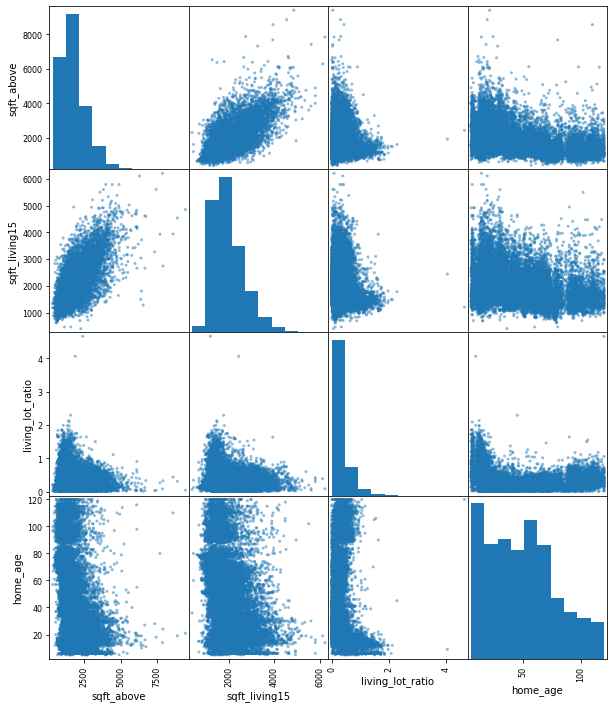

In [68]:
# Reviewing the variable distributions

x_cols = ['sqft_above','sqft_living15','living_lot_ratio','home_age']
pd.plotting.scatter_matrix(train[x_cols], figsize=(10,12));

C:\Users\samsung\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


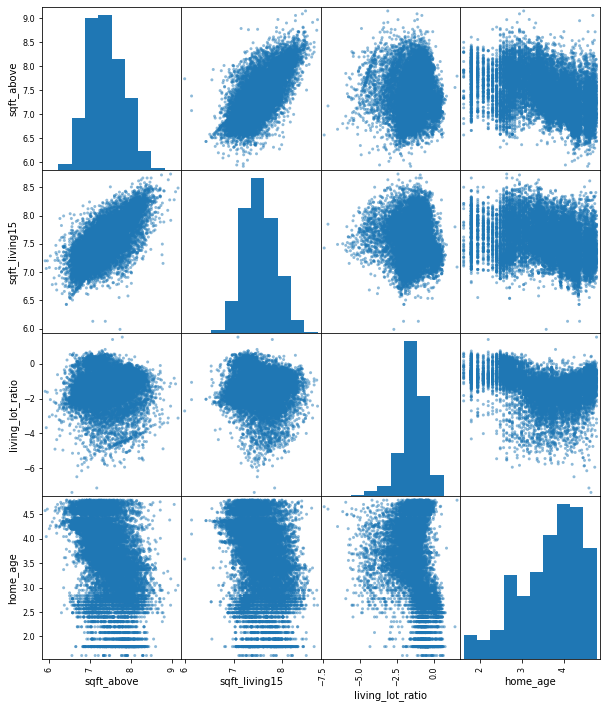

In [69]:
# Log transformations for x_cols

for feat in x_cols:
    train[feat] = train[feat].map(lambda x: np.log(x))
    
pd.plotting.scatter_matrix(train[x_cols], figsize=(10,12));

In [70]:
train.head()

,price,has_waterfront,sqft_above,has_basement,sqft_living15,home_age,living_lot_ratio,zip_98002,zip_98003,zip_98004,...,bwr_5_5,bwr_5_75,bwr_6_0,bwr_6_25,bwr_6_5,bwr_6_75,bwr_7_5,bwr_7_75,bwr_8_0,bwr_9_0
1411,585444.0,0,7.402452,1,7.570443,4.060443,-0.927036,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16334,743700.0,0,7.867106,0,7.962067,3.465736,-2.543380,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20730,265000.0,0,6.988413,0,6.988413,3.784190,-1.151027,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6371,800000.0,0,7.265430,0,7.803843,4.189655,-2.668587,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16168,480000.0,0,7.999679,0,7.749322,2.197225,-0.312702,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Performing updated stepwise addition

result_final = stepwise_selection(train.drop(['price'], axis=1), train['price'], verbose=True)
print('resulting features:')
print(result_final)

Add  sqft_above                     with p-value 0.0
Add  has_basement                   with p-value 0.0
Add  zip_98004                      with p-value 0.0
Add  has_waterfront                 with p-value 8.59205e-274
Add  zip_98039                      with p-value 9.06139e-263
Add  zip_98112                      with p-value 1.93168e-147
Add  zip_98040                      with p-value 8.13676e-143
Add  bwr_9_0                        with p-value 4.80735e-144
Add  bwr_2_5                        with p-value 1.21809e-102
Add  sqft_living15                  with p-value 1.88641e-105
Add  beds_2                         with p-value 4.70486e-85
Add  zip_98023                      with p-value 4.83695e-75
Add  baths_7_75                     with p-value 9.30183e-69
Add  bwr_7_75                       with p-value 9.30183e-69
Add  zip_98105                      with p-value 1.09915e-66
Add  zip_98033                      with p-value 6.38392e-68
Add  zip_98103                      with 

C:\Users\samsung\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Drop bwr_2_5                        with p-value 0.054202
Add  floors_1_5                     with p-value 1.04781e-10
Add  baths_3_0                      with p-value 2.01569e-07
Add  zip_98011                      with p-value 2.69443e-07
Add  zip_98077                      with p-value 8.17128e-07
Add  floors_3_0                     with p-value 1.14836e-06
Add  baths_8_0                      with p-value 3.73125e-07
Add  bwr_8_0                        with p-value 4.00313e-28
Add  zip_98166                      with p-value 2.7405e-06
Add  baths_2_75                     with p-value 4.33105e-06
Add  beds_7                         with p-value 4.16377e-06
Add  beds_9                         with p-value 4.20273e-06
Add  beds_10                        with p-value 4.03389e-06
Add  zip_98045                      with p-value 6.7417e-06
Add  zip_98059                      with p-value 2.11695e-06
Add  zip_98065                      with p-value 5.02846e-05
Drop zip_98038               

In [73]:
# OLS after updated stepwise

outcome3 = 'price'
predictors3 = train.drop('price',axis=1)
pred_sum3 = '+'.join(predictors3[result_final])
formula3 = outcome3 + '~' + pred_sum3

model3 = ols(formula=formula3, data=train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     648.9
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:45:32   Log-Likelihood:            -2.3292e+05
No. Observations:               17276   AIC:                         4.660e+05
Df Residuals:                   17182   BIC:                         4.668e+05
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.738e+06    4.7e+04    -79.586      0.000   -3.83e+06   -3.65e+06
sqft_above        3.695e+05   6532.334     56.557      0.000    3.57e+05    3.82e+05
has_basement       8.62e+04   3593.361     23.989      0.000    7.92e+04    9.32e+04
zip_98004         8.234e+05   1.15e+04     71.681      0.000    8.01e+05    8.46e+05
has_waterfront    8.362e+05   1.66e+04     50.255      0.000    8.04e+05    8.69e+05
zip_98039          1.28e+06    2.8e+04     45.674      0.000    1.22e+06    1.33e+06
zip_98112         6.587e+05   1.27e+04     51.837      0.000    6.34e+05    6.84e+05
zip_98040         5.453e+05   1.24e+04     43.886      0.000    5.21e+05     5.7e+05
bwr_9_0           3.709e+06   1.31e+05     28.229      0.000    3.45e+06    3.97e+06
sqft_living15     1.651e+05   6669.446     24.753      0.000    1.52e+05    1.78e+05
beds_2            2.761e+04   4650.374      5.937      0.000    1.85e+04    3.67e+04
zip_98023        -3.741e+04   9278.092     -4.033      0.000   -5.56e+04   -1.92e+04
baths_7_75        2.305e+06   8.83e+04     26.088      0.000    2.13e+06    2.48e+06
bwr_7_75          2.305e+06   8.83e+04     26.088      0.000    2.13e+06    2.48e+06
zip_98105         5.473e+05   1.38e+04     39.664      0.000     5.2e+05    5.74e+05
zip_98033         3.755e+05   9819.987     38.240      0.000    3.56e+05    3.95e+05
zip_98103         3.954e+05   9261.717     42.696      0.000    3.77e+05    4.14e+05
zip_98199         4.543e+05   1.16e+04     39.126      0.000    4.32e+05    4.77e+05
zip_98119         5.524e+05   1.51e+04     36.677      0.000    5.23e+05    5.82e+05
zip_98117          3.86e+05   9170.305     42.097      0.000    3.68e+05    4.04e+05
zip_98115         3.768e+05   8958.145     42.065      0.000    3.59e+05    3.94e+05
zip_98006         3.276e+05   9428.106     34.747      0.000    3.09e+05    3.46e+05
zip_98109         5.918e+05    1.9e+04     31.164      0.000    5.55e+05    6.29e+05
bwr_4_25          4.785e+05   1.86e+04     25.770      0.000    4.42e+05    5.15e+05
zip_98107          4.11e+05   1.26e+04     32.533      0.000    3.86e+05    4.36e+05
zip_98122         4.075e+05   1.23e+04     33.125      0.000    3.83e+05    4.32e+05
zip_98116         3.716e+05   1.16e+04     32.007      0.000    3.49e+05    3.94e+05
zip_98102         5.668e+05   2.01e+04     28.192      0.000    5.27e+05    6.06e+05
zip_98092        -5.225e+04   1.05e+04     -4.969      0.000   -7.29e+04   -3.16e+04
zip_98144          3.53e+05   1.14e+04     30.940      0.000    3.31e+05    3.75e+05
bwr_6_0           1.384e+06   8.83e+04     15.682      0.000    1.21e+06    1.56e+06
baths_4_0         3.478e+05    1.7e+04     20.407      0.000    3.14e+05    3.81e+05
bwr_5_75          2.117e+06   1.24e+05     17.037      0.000    1.87e+06    2.36e+06
bwr_4_5           3.291

In [78]:
# With the first 30 independent variables included

outcome3 = 'price'
predictors3 = train.drop('price',axis=1)
pred_sum3 = '+'.join(predictors3[result_final[0:30]])
formula3 = outcome3 + '~' + pred_sum3

model3 = ols(formula=formula3, data=train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     1347.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:48:24   Log-Likelihood:            -2.3571e+05
No. Observations:               17276   AIC:                         4.715e+05
Df Residuals:                   17246   BIC:                         4.717e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.883e+06   4.02e+04    -96.518      0.000   -3.96e+06    -3.8e+06
sqft_above      3.825e+05   5882.008     65.031      0.000    3.71e+05    3.94e+05
has_basement    1.272e+05   3608.305     35.261      0.000     1.2e+05    1.34e+05
zip_98004       7.273e+05   1.29e+04     56.257      0.000    7.02e+05    7.53e+05
has_waterfront  8.816e+05   1.92e+04     45.861      0.000    8.44e+05    9.19e+05
zip_98039       1.305e+06   3.21e+04     40.633      0.000    1.24e+06    1.37e+06
zip_98112       5.092e+05   1.41e+04     35.993      0.000    4.81e+05    5.37e+05
zip_98040       4.387e+05   1.41e+04     31.184      0.000    4.11e+05    4.66e+05
bwr_9_0         6.016e+06   2.05e+05     29.283      0.000    5.61e+06    6.42e+06
sqft_living15   1.925e+05   7289.403     26.410      0.000    1.78e+05    2.07e+05
beds_2          7.248e+04   5220.031     13.885      0.000    6.22e+04    8.27e+04
zip_98023      -1.604e+05   1.04e+04    -15.415      0.000   -1.81e+05    -1.4e+05
baths_7_75      2.121e+06   1.03e+05     20.538      0.000    1.92e+06    2.32e+06
bwr_7_75        2.121e+06   1.03e+05     20.538      0.000    1.92e+06    2.32e+06
zip_98105       3.792e+05   1.55e+04     24.523      0.000    3.49e+05     4.1e+05
zip_98033       2.623e+05    1.1e+04     23.802      0.000    2.41e+05    2.84e+05
zip_98103       2.388e+05   9605.317     24.864      0.000     2.2e+05    2.58e+05
zip_98199       3.037e+05    1.3e+04     23.361      0.000    2.78e+05    3.29e+05
zip_98119       3.798e+05    1.7e+04     22.370      0.000    3.47e+05    4.13e+05
zip_98117       2.351e+05   9918.097     23.708      0.000    2.16e+05    2.55e+05
zip_98115       2.281e+05   9700.180     23.511      0.000    2.09e+05    2.47e+05
zip_98006       2.122e+05   1.05e+04     20.254      0.000    1.92e+05    2.33e+05
zip_98109       4.244e+05   2.17e+04     19.528      0.000    3.82e+05    4.67e+05
bwr_4_25        3.982e+05   2.14e+04     18.573      0.000    3.56e+05     4.4e+05
zip_98107        2.45e+05   1.39e+04     17.625      0.000    2.18e+05    2.72e+05
zip_98122       2.423e+05   1.37e+04     17.717      0.000    2.15e+05    2.69e+05
zip_98116       2.212e+05    1.3e+04     17.050      0.000    1.96e+05    2.47e+05
zip_98102       3.822e+05    2.3e+04     16.581      0.000    3.37e+05    4.27e+05
zip_98092      -1.759e+05   1.19e+04    -14.764      0.000   -1.99e+05   -1.53e+05
zip_98144       1.797e+05   1.26e+04     14.296      0.000    1.55e+05    2.04e+05
bwr_6_0         1.406e+06   1.03e+05     13.706      0.000    1.21e+06    1.61e+06
==============================================================================
Omnibus:                    12957.570   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           860389.341
Skew:                   

In [82]:
# Scaling two of the log_transformed variables -- sqft_above and sqft_living15

logsqft_above = train['sqft_above']
logsqft_living15 = train['sqft_living15']

scaled_logsqft_above = (logsqft_above -min(logsqft_above))/(max(logsqft_above)-min(logsqft_above))
scaled_logsqft_living15 = (logsqft_living15 -min(logsqft_living15))/(max(logsqft_living15)-min(logsqft_living15))

In [84]:
train['scaled_sqft_above'] = scaled_logsqft_above
train['scaled_sqft_living15'] = scaled_logsqft_living15

C:\Users\samsung\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\samsung\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#train = train.drop(['scaled_sqft_living'], axis=1)

In [87]:
train.head()

,price,has_waterfront,sqft_above,has_basement,sqft_living15,home_age,living_lot_ratio,zip_98002,zip_98003,zip_98004,...,bwr_6_0,bwr_6_25,bwr_6_5,bwr_6_75,bwr_7_5,bwr_7_75,bwr_8_0,bwr_9_0,scaled_sqft_living15,scaled_sqft_above
1411,585444.0,0,7.402452,1,7.570443,4.060443,-0.927036,0,0,0,...,0,0,0,0,0,0,0,0,0.576141,0.460116
16334,743700.0,0,7.867106,0,7.962067,3.465736,-2.543380,0,0,0,...,0,0,0,0,0,0,0,0,0.718812,0.603704
20730,265000.0,0,6.988413,0,6.988413,3.784190,-1.151027,0,0,0,...,0,0,0,0,0,0,0,0,0.364105,0.332170
6371,800000.0,0,7.265430,0,7.803843,4.189655,-2.668587,0,0,1,...,0,0,0,0,0,0,0,0,0.661170,0.417774
16168,480000.0,0,7.999679,0,7.749322,2.197225,-0.312702,0,0,0,...,0,0,0,0,0,0,0,0,0.641308,0.644672


In [90]:
# After scaling two features

outcome3 = 'price'
predictors3 = train.drop('price',axis=1)
pred_sum3 = '+'.join(predictors3)
formula3 = outcome3 + '~' + pred_sum3

model3 = ols(formula=formula3, data=train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     443.0
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:07:12   Log-Likelihood:            -2.3286e+05
No. Observations:               17276   AIC:                         4.660e+05
Df Residuals:                   17138   BIC:                         4.671e+05
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -4.076e+05    1.2e+04    -34.019      0.000   -4.31e+05   -3.84e+05
has_waterfront        8.365e+05    1.7e+04     49.243      0.000    8.03e+05     8.7e+05
sqft_above            1.349e+05   7943.423     16.981      0.000    1.19e+05     1.5e+05
has_basement          8.849e+04   3732.549     23.708      0.000    8.12e+04    9.58e+04
sqft_living15        -1.429e+05   9063.203    -15.767      0.000   -1.61e+05   -1.25e+05
home_age             -2318.2191   3001.302     -0.772      0.440   -8201.078    3564.640
living_lot_ratio     -3.499e+04   2275.877    -15.375      0.000   -3.95e+04   -3.05e+04
zip_98002             2.972e+04   1.77e+04      1.684      0.092   -4881.000    6.43e+04
zip_98003             8567.2984   1.57e+04      0.546      0.585   -2.22e+04    3.93e+04
zip_98004             8.432e+05   1.54e+04     54.846      0.000    8.13e+05    8.73e+05
zip_98005             3.322e+05   1.83e+04     18.148      0.000    2.96e+05    3.68e+05
zip_98006              3.46e+05   1.39e+04     24.904      0.000    3.19e+05    3.73e+05
zip_98007               2.8e+05   1.98e+04     14.166      0.000    2.41e+05    3.19e+05
zip_98008             3.028e+05   1.58e+04     19.139      0.000    2.72e+05    3.34e+05
zip_98010             5.802e+04   2.26e+04      2.569      0.010    1.38e+04    1.02e+05
zip_98011             1.279e+05   1.77e+04      7.239      0.000    9.33e+04    1.63e+05
zip_98014             7.458e+04   2.04e+04      3.651      0.000    3.45e+04    1.15e+05
zip_98019              5.45e+04    1.8e+04      3.031      0.002    1.93e+04    8.97e+04
zip_98022             1.005e+04   1.64e+04      0.612      0.540   -2.21e+04    4.22e+04
zip_98023            -1.704e+04   1.37e+04     -1.241      0.215    -4.4e+04    9874.834
zip_98024             1.101e+05   2.39e+04      4.597      0.000    6.31e+04    1.57e+05
zip_98027             1.715e+05   1.43e+04     11.955      0.000    1.43e+05       2e+05
zip_98028             1.277e+05   1.57e+04      8.128      0.000    9.69e+04    1.59e+05
zip_98029             2.458e+05   1.54e+04     15.994      0.000    2.16e+05    2.76e+05
zip_98030            -1913.2814   1.62e+04     -0.118      0.906   -3.36e+04    2.98e+04
zip_98031             1.661e+04   1.57e+04      1.056      0.291   -1.42e+04    4.75e+04
zip_98032             2.671e+04   1.98e+04      1.347      0.178   -1.21e+04    6.56e+04
zip_98033              3.95e+05   1.41e+04     27.973      0.000    3.67e+05    4.23e+05
zip_98034             2.241e+05   1.35e+04     16.607      0.000    1.98e+05    2.51e+05
zip_98038             1.848e+04   1.33e+04      1.390      0.164   -7573.177    4.45e+04
zip_98039             1.293e+06   2.99e+04     43.270      0.000    1.23e+06    1.35e+06
zip_98040             5.644e+05   1.62e+04     34.945    

In [91]:
result_final = stepwise_selection(train.drop(['price'], axis=1), train['price'], verbose=True)
print('resulting features:')
print(result_final)

Add  scaled_sqft_above              with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  has_basement                   with p-value 0.0
Add  zip_98004                      with p-value 0.0
Add  has_waterfront                 with p-value 8.59205e-274
Add  zip_98039                      with p-value 9.06139e-263
Add  zip_98112                      with p-value 1.93168e-147
Add  zip_98040                      with p-value 8.13676e-143
Add  bwr_9_0                        with p-value 4.80735e-144
Add  bwr_2_5                        with p-value 1.21809e-102
Add  sqft_living15                  with p-value 1.88641e-105
Add  scaled_sqft_living15           with p-value 0.0
Add  beds_2                         with p-value 4.70486e-85
Add  zip_98023                      with p-value 4.83695e-75
Add  baths_7_75                     with p-value 9.30183e-69
Add  bwr_7_75                       with p-value 9.30183e-69
Add  zip_98105                      with p-value 1.09915e

C:\Users\samsung\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Drop bwr_2_5                        with p-value 0.054202
Add  floors_1_5                     with p-value 1.04781e-10
Add  baths_3_0                      with p-value 2.01569e-07
Add  zip_98011                      with p-value 2.69443e-07
Add  zip_98077                      with p-value 8.17128e-07
Add  floors_3_0                     with p-value 1.14836e-06
Add  bwr_8_0                        with p-value 3.73125e-07
Add  baths_8_0                      with p-value 8.90948e-170
Add  zip_98166                      with p-value 2.7405e-06
Add  baths_2_75                     with p-value 4.33105e-06
Add  beds_7                         with p-value 4.16377e-06
Add  beds_9                         with p-value 4.20273e-06
Add  beds_10                        with p-value 4.03389e-06
Add  zip_98045                      with p-value 6.7417e-06
Add  zip_98059                      with p-value 2.11695e-06
Add  zip_98065                      with p-value 5.02846e-05
Drop zip_98038              

In [92]:
# Stepwise addition after scaling

outcome3 = 'price'
predictors3 = train.drop('price',axis=1)
pred_sum3 = '+'.join(predictors3[result_final])
formula3 = outcome3 + '~' + pred_sum3

model3 = ols(formula=formula3, data=train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     648.9
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:49:40   Log-Likelihood:            -2.3292e+05
No. Observations:               17276   AIC:                         4.660e+05
Df Residuals:                   17182   BIC:                         4.668e+05
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -4.16e+05   5223.672    -79.628      0.000   -4.26e+05   -4.06e+05
scaled_sqft_above     7.981e+05   9726.425     82.052      0.000    7.79e+05    8.17e+05
sqft_above            1.228e+05   5246.545     23.412      0.000    1.13e+05    1.33e+05
has_basement           8.62e+04   3593.361     23.989      0.000    7.92e+04    9.32e+04
zip_98004             8.234e+05   1.15e+04     71.681      0.000    8.01e+05    8.46e+05
has_waterfront        8.362e+05   1.66e+04     50.255      0.000    8.04e+05    8.69e+05
zip_98039              1.28e+06    2.8e+04     45.674      0.000    1.22e+06    1.33e+06
zip_98112             6.587e+05   1.27e+04     51.837      0.000    6.34e+05    6.84e+05
zip_98040             5.453e+05   1.24e+04     43.886      0.000    5.21e+05     5.7e+05
bwr_9_0               3.709e+06   1.31e+05     28.229      0.000    3.45e+06    3.97e+06
sqft_living15        -1.461e+05   5227.444    -27.955      0.000   -1.56e+05   -1.36e+05
scaled_sqft_living15  8.543e+05   1.13e+04     75.921      0.000    8.32e+05    8.76e+05
beds_2                2.761e+04   4650.374      5.937      0.000    1.85e+04    3.67e+04
zip_98023            -3.741e+04   9278.092     -4.033      0.000   -5.56e+04   -1.92e+04
baths_7_75            2.305e+06   8.83e+04     26.088      0.000    2.13e+06    2.48e+06
bwr_7_75              2.305e+06   8.83e+04     26.088      0.000    2.13e+06    2.48e+06
zip_98105             5.473e+05   1.38e+04     39.664      0.000     5.2e+05    5.74e+05
zip_98033             3.755e+05   9819.987     38.240      0.000    3.56e+05    3.95e+05
zip_98103             3.954e+05   9261.717     42.696      0.000    3.77e+05    4.14e+05
zip_98199             4.543e+05   1.16e+04     39.126      0.000    4.32e+05    4.77e+05
zip_98119             5.524e+05   1.51e+04     36.677      0.000    5.23e+05    5.82e+05
zip_98117              3.86e+05   9170.305     42.097      0.000    3.68e+05    4.04e+05
zip_98115             3.768e+05   8958.145     42.065      0.000    3.59e+05    3.94e+05
zip_98006             3.276e+05   9428.106     34.747      0.000    3.09e+05    3.46e+05
zip_98109             5.918e+05    1.9e+04     31.164      0.000    5.55e+05    6.29e+05
bwr_4_25              4.785e+05   1.86e+04     25.770      0.000    4.42e+05    5.15e+05
zip_98107              4.11e+05   1.26e+04     32.533      0.000    3.86e+05    4.36e+05
zip_98122             4.075e+05   1.23e+04     33.125      0.000    3.83e+05    4.32e+05
zip_98116             3.716e+05   1.16e+04     32.007      0.000    3.49e+05    3.94e+05
zip_98102             5.668e+05   2.01e+04     28.192      0.000    5.27e+05    6.06e+05
zip_98092            -5.225e+04   1.05e+04     -4.969      0.000   -7.29e+04   -3.16e+04
zip_98144              3.53e+05   1.14e+04     30.940    

Transforming The Target Variable:
--

Now, what I'll do is a log-transform and scale for the target variable "price" so as to hopefully make higher home prices less of an outlier to the entire dataset.

In [93]:
# Log-transform the price, to see impact

train['price'] = train['price'].map(lambda x: np.log(x))

In [176]:
train.head()

,price,has_waterfront,sqft_above,has_basement,sqft_living15,home_age,living_lot_ratio,zip_98002,zip_98003,zip_98004,...,bwr_5_5,bwr_5_75,bwr_6_0,bwr_6_25,bwr_6_5,bwr_6_75,bwr_7_5,bwr_7_75,bwr_8_0,bwr_9_0
1411,13.280126,0,7.402452,1,7.570443,4.060443,-0.927036,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16334,13.519393,0,7.867106,0,7.962067,3.465736,-2.543380,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20730,12.487485,0,6.988413,0,6.988413,3.784190,-1.151027,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6371,13.592367,0,7.265430,0,7.803843,4.189655,-2.668587,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16168,13.081541,0,7.999679,0,7.749322,2.197225,-0.312702,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# Remember to change column name to "log_scaled_price"

result_final = stepwise_selection(train.drop(['price'], axis=1), train['price'], verbose=True)
print('resulting features:')
print(result_final)

Add  bwr_1_0                        with p-value 0.0
Add  scaled_sqft_above              with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  has_basement                   with p-value 0.0
Add  scaled_sqft_living15           with p-value 0.0
Add  zip_98023                      with p-value 9.20819e-179
Add  zip_98004                      with p-value 5.59849e-169
Add  zip_98042                      with p-value 5.72389e-127
Add  zip_98103                      with p-value 6.40174e-120
Add  zip_98092                      with p-value 1.72542e-116
Add  zip_98038                      with p-value 7.46816e-118
Add  zip_98117                      with p-value 1.86558e-112
Add  zip_98112                      with p-value 1.59618e-118
Add  zip_98115                      with p-value 4.74214e-118
Drop bwr_1_0                        with p-value 0.0596762


C:\Users\samsung\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  has_waterfront                 with p-value 1.33913e-122
Add  zip_98003                      with p-value 3.60782e-102
Add  zip_98030                      with p-value 3.99632e-102
Add  zip_98058                      with p-value 7.71096e-101
Add  zip_98031                      with p-value 1.63835e-106
Add  zip_98168                      with p-value 3.97005e-99
Add  zip_98002                      with p-value 2.85919e-100
Add  zip_98198                      with p-value 6.95065e-97
Add  zip_98040                      with p-value 3.67911e-92
Add  zip_98199                      with p-value 5.21851e-95
Add  zip_98119                      with p-value 2.44657e-98
Add  zip_98105                      with p-value 4.46774e-102
Add  zip_98107                      with p-value 3.09807e-100
Add  zip_98033                      with p-value 9.13798e-103
Add  zip_98039                      with p-value 1.02639e-105
Add  zip_98116                      with p-value 2.07897e-96
Add  zip_98122

Dropping Scaled Independent Features:
--

I'll drop scaled sqft_above and sqft_living15 as they are both highly correlated with the other non-scaled log-transformed variable counterparts and proving to not offer significant increase in impact on R2 value

In [105]:
# Dropping two scaled as they don't present significant value beyond what the only-log-transformed variables provide
train = train.drop(columns=['scaled_sqft_living15','scaled_sqft_above'], axis=1)

In [107]:
# Stepwise addition after dropping above variables

result_final = stepwise_selection(train.drop(['price'], axis=1), train['price'], verbose=True)
print('resulting features:')
print(result_final)

Add  bwr_1_0                        with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  has_basement                   with p-value 0.0
Add  zip_98023                      with p-value 9.20819e-179
Add  zip_98004                      with p-value 5.59849e-169
Add  zip_98042                      with p-value 5.72389e-127
Add  zip_98103                      with p-value 6.40174e-120
Add  zip_98092                      with p-value 1.72542e-116
Add  zip_98038                      with p-value 7.46816e-118
Add  zip_98117                      with p-value 1.86558e-112
Add  zip_98112                      with p-value 1.59618e-118
Add  zip_98115                      with p-value 4.74214e-118
Drop bwr_1_0                        with p-value 0.0596762


C:\Users\samsung\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  has_waterfront                 with p-value 1.33913e-122
Add  zip_98003                      with p-value 3.60782e-102
Add  zip_98030                      with p-value 3.99632e-102
Add  zip_98058                      with p-value 7.71096e-101
Add  zip_98031                      with p-value 1.63835e-106
Add  zip_98168                      with p-value 3.97005e-99
Add  zip_98002                      with p-value 2.85919e-100
Add  zip_98198                      with p-value 6.95065e-97
Add  zip_98040                      with p-value 3.67911e-92
Add  zip_98199                      with p-value 5.21851e-95
Add  zip_98119                      with p-value 2.44657e-98
Add  zip_98105                      with p-value 4.46774e-102
Add  zip_98107                      with p-value 3.09807e-100
Add  zip_98033                      with p-value 9.13798e-103
Add  zip_98039                      with p-value 1.02639e-105
Add  zip_98116                      with p-value 2.07897e-96
Add  zip_98122

In [108]:
# OLS model after log-transform and scale of target variable

outcome3 = 'price'
predictors3 = train.drop('price',axis=1)
pred_sum3 = '+'.join(predictors3[result_final])
formula3 = outcome3 + '~' + pred_sum3

model3 = ols(formula=formula3, data=train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1041.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:59:47   Log-Likelihood:                 3304.7
No. Observations:               17276   AIC:                            -6411.
Df Residuals:                   17177   BIC:                            -5643.
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.0380      0.056    106.888      0.000       5.927       6.149
sqft_above           0.5731      0.007     76.812      0.000       0.558       0.588
sqft_living15        0.2952      0.008     38.041      0.000       0.280       0.310
has_basement         0.1534      0.004     37.088      0.000       0.145       0.162
zip_98023           -0.0675      0.011     -6.047      0.000      -0.089      -0.046
zip_98004            1.1201      0.014     81.915      0.000       1.093       1.147
zip_98103            0.9067      0.011     79.695      0.000       0.884       0.929
zip_98092           -0.0307      0.013     -2.443      0.015      -0.055      -0.006
zip_98117            0.8836      0.011     78.808      0.000       0.862       0.906
zip_98112            1.0954      0.015     71.950      0.000       1.066       1.125
zip_98115            0.8585      0.011     78.061      0.000       0.837       0.880
has_waterfront       0.6988      0.019     35.978      0.000       0.661       0.737
zip_98002           -0.0497      0.017     -2.924      0.003      -0.083      -0.016
zip_98040            0.9144      0.015     61.847      0.000       0.885       0.943
zip_98199            0.9260      0.014     66.592      0.000       0.899       0.953
zip_98119            1.0613      0.018     59.453      0.000       1.026       1.096
zip_98105            1.0056      0.016     61.178      0.000       0.973       1.038
zip_98107            0.9225      0.015     61.366      0.000       0.893       0.952
zip_98033            0.7768      0.012     65.884      0.000       0.754       0.800
zip_98039            1.2955      0.032     39.957      0.000       1.232       1.359
zip_98116            0.8430      0.014     60.754      0.000       0.816       0.870
zip_98122            0.8770      0.015     59.450      0.000       0.848       0.906
zip_98109            1.0846      0.022     48.665      0.000       1.041       1.128
zip_98032           -0.0403      0.020     -2.026      0.043      -0.079      -0.001
zip_98102            1.0608      0.024     45.013      0.000       1.015       1.107
zip_98006            0.6788      0.011     59.631      0.000       0.657       0.701
zip_98136            0.7545      0.015     49.190      0.000       0.724       0.785
zip_98144            0.7430      0.014     54.328      0.000       0.716       0.770
living_lot_ratio    -0.0647      0.003    -25.064      0.000      -0.070      -0.060
zip_98126            0.6344      0.013     48.194      0.000       0.609       0.660
zip_98052            0.5980      0.011     55.832      0.000       0.577       0.619
zip_98008            0.6558      0.014     45.676      0.000       0.628       0.684
zip_98005            0.7081      0.018     39.668      0.000       0.673       0.743
zip_98177            0.

0.856 R-squared value:
--

This is the best model up to now, and there are some interesting insights:

- Sqft_above increase has larger positive impact on target variable than Sqft_living15
- Having a basement leads to a positive increase in home price
- As living_lot_ratio increases, home price goes down slightly
- Zipcode continues to dominate the feature selection

In [110]:
# Evaluating impact of dropping zipcodes from the model
# Removing them here

zipless_train = train.drop([i for i in train if 'zip' in i], axis=1)

In [111]:
# Performing stepwise addition after dropping zipcodes

result_final = stepwise_selection(zipless_train.drop(['price'], axis=1), zipless_train['price'], verbose=True)
print('resulting features:')
print(result_final)

Add  sqft_living15                  with p-value 0.0
Add  sqft_above                     with p-value 4.65738e-299
Add  has_basement                   with p-value 0.0
Add  home_age                       with p-value 4.82146e-107
Add  living_lot_ratio               with p-value 3.97098e-180
Add  beds_2                         with p-value 8.69064e-93
Add  has_waterfront                 with p-value 1.198e-83
Add  floors_3_0                     with p-value 4.39539e-76
Add  bwr_2_5                        with p-value 1.20376e-30
Add  baths_3_25                     with p-value 4.97949e-15
Add  bwr_3_5                        with p-value 9.34605e-18
Add  bwr_3_75                       with p-value 2.29564e-16
Add  bwr_4_0                        with p-value 7.15322e-16
Add  bwr_4_25                       with p-value 5.61301e-14
Add  floors_1_5                     with p-value 2.35379e-10
Add  bwr_4_5                        with p-value 6.23256e-11
Add  bwr_5_0                        wit

C:\Users\samsung\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  bwr_6_0                        with p-value 2.7375e-05
Drop bwr_2_5                        with p-value 0.0831958
Add  bwr_3_0                        with p-value 7.95024e-06
Add  beds_6                         with p-value 4.25201e-05
Add  baths_7_75                     with p-value 3.76654e-05
Add  bwr_7_75                       with p-value 3.76654e-05
Add  bwr_9_0                        with p-value 0.000353533
Add  bwr_1_0                        with p-value 0.000739672
Add  bwr_1_5                        with p-value 0.000416569
Add  baths_3_75                     with p-value 0.000867058
Add  bwr_6_5                        with p-value 0.00235412
resulting features:
['sqft_living15', 'sqft_above', 'has_basement', 'home_age', 'living_lot_ratio', 'beds_2', 'has_waterfront', 'floors_3_0', 'bwr_3_5', 'bwr_3_75', 'bwr_4_0', 'bwr_4_25', 'floors_1_5', 'bwr_4_5', 'bwr_5_0', 'baths_5_5', 'floors_2_5', 'floors_2_0', 'bwr_5_25', 'bwr_5_75', 'bwr_2_75', 'beds_3', 'baths_4_75', 'bwr_3_2

In [112]:
# Modeling

outcome3 = 'price'
predictors3 = train.drop('price',axis=1)
pred_sum3 = '+'.join(predictors3[result_final])
formula3 = outcome3 + '~' + pred_sum3

model3 = ols(formula=formula3, data=train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     714.7
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:10:50   Log-Likelihood:                -5985.6
No. Observations:               17276   AIC:                         1.204e+04
Df Residuals:                   17242   BIC:                         1.230e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.5898      0.091     50.334      0.000       4.411       4.769
sqft_living15        0.5188      0.012     41.865      0.000       0.494       0.543
sqft_above           0.5301      0.013     41.514      0.000       0.505       0.555
has_basement         0.2269      0.007     32.900      0.000       0.213       0.240
home_age             0.1535      0.005     30.797      0.000       0.144       0.163
living_lot_ratio     0.0789      0.004     21.638      0.000       0.072       0.086
beds_2               0.1833      0.010     17.856      0.000       0.163       0.203
has_waterfront       0.5770      0.032     17.792      0.000       0.513       0.641
floors_3_0           0.3217      0.019     17.127      0.000       0.285       0.358
bwr_3_5              0.2229      0.015     15.048      0.000       0.194       0.252
bwr_3_75             0.1920      0.046      4.148      0.000       0.101       0.283
bwr_4_0              0.3099      0.029     10.852      0.000       0.254       0.366
bwr_4_25             0.4131      0.036     11.392      0.000       0.342       0.484
floors_1_5           0.0847      0.010      8.329      0.000       0.065       0.105
bwr_4_5              0.3122      0.035      8.920      0.000       0.244       0.381
bwr_5_0              0.4725      0.071      6.700      0.000       0.334       0.611
baths_5_5            0.6989      0.133      5.251      0.000       0.438       0.960
floors_2_5           0.1432      0.031      4.611      0.000       0.082       0.204
floors_2_0           0.0327      0.009      3.776      0.000       0.016       0.050
bwr_5_25             0.4688      0.092      5.095      0.000       0.288       0.649
bwr_5_75             1.0842      0.243      4.467      0.000       0.608       1.560
bwr_2_75             0.0724      0.012      6.199      0.000       0.050       0.095
beds_3               0.0290      0.006      4.620      0.000       0.017       0.041
baths_4_75           0.4159      0.084      4.967      0.000       0.252       0.580
bwr_3_25             0.2287      0.017     13.700      0.000       0.196       0.261
bwr_6_0              0.7961      0.172      4.631      0.000       0.459       1.133
bwr_3_0              0.0655      0.014      4.668      0.000       0.038       0.093
beds_6              -0.1155      0.024     -4.820      0.000      -0.162      -0.069
baths_7_75           0.7320      0.172      4.259      0.000       0.395       1.069
bwr_7_75             0.7320      0.172      4.259      0.000       0.395       1.069
bwr_9_0              1.2606      0.345      3.655      0.000       0.584       1.937
bwr_1_0             -0.0397      0.009     -4.346      0.000      -0.058      -0.022
bwr_1_5             -0.0401      0.011     -3.583      0.000      -0.062      -0.018
baths_3_75           0.

Key Question: Should zipcode features be included in the model?
--

This answer isn't clear. If they are dropped, the R2 value decreases significantly. If they are kept, the model R2 value is largely based on the zipcodes and I imagine this opens the model up to be overfit to the dataset.

Overall, I <b>do</b> think zipcodes should be apart of the model because location will continue to be important to real estate in general.

So, given a home's zipcode, square footage above ground, evidence regarding whether there's a basement, home_age and living_lot_ratio, what's the R-squared value for the model?

In [129]:
include1 = [i for i in train if 'zip' in i]
include2 = ['sqft_above','has_basement','home_age','living_lot_ratio']

outcome3 = 'price'
predictors3 = train.drop('price',axis=1)
pred_sum3 = '+'.join(predictors3[include1+include2])
formula3 = outcome3 + '~' + pred_sum3

model3 = ols(formula=formula3, data=train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     1094.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:19:55   Log-Likelihood:                 1517.0
No. Observations:               17276   AIC:                            -2886.
Df Residuals:                   17202   BIC:                            -2312.
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.6290      0.043    152.650      0.000       6.544       6.714
zip_98002           -0.0195      0.023     -0.867      0.386      -0.064       0.025
zip_98003            0.0593      0.020      2.954      0.003       0.020       0.099
zip_98004            1.2569      0.019     64.583      0.000       1.219       1.295
zip_98005            0.8338      0.023     35.799      0.000       0.788       0.879
zip_98006            0.8217      0.018     46.747      0.000       0.787       0.856
zip_98007            0.7387      0.025     29.328      0.000       0.689       0.788
zip_98008            0.7643      0.020     37.921      0.000       0.725       0.804
zip_98010            0.2302      0.029      7.998      0.000       0.174       0.287
zip_98011            0.4802      0.023     21.291      0.000       0.436       0.524
zip_98014            0.2654      0.026     10.182      0.000       0.214       0.316
zip_98019            0.2851      0.023     12.419      0.000       0.240       0.330
zip_98022            0.0796      0.021      3.796      0.000       0.038       0.121
zip_98023            0.0163      0.018      0.929      0.353      -0.018       0.051
zip_98024            0.3872      0.031     12.663      0.000       0.327       0.447
zip_98027            0.5588      0.018     30.603      0.000       0.523       0.595
zip_98028            0.4529      0.020     22.564      0.000       0.414       0.492
zip_98029            0.6929      0.020     35.398      0.000       0.655       0.731
zip_98030            0.0521      0.021      2.517      0.012       0.012       0.093
zip_98031            0.1054      0.020      5.242      0.000       0.066       0.145
zip_98032            0.0104      0.025      0.412      0.680      -0.039       0.060
zip_98033            0.8863      0.018     49.226      0.000       0.851       0.922
zip_98034            0.5944      0.017     34.500      0.000       0.561       0.628
zip_98038            0.1677      0.017      9.886      0.000       0.134       0.201
zip_98039            1.5031      0.037     40.612      0.000       1.431       1.576
zip_98040            1.0912      0.020     53.569      0.000       1.051       1.131
zip_98042            0.0795      0.017      4.581      0.000       0.045       0.113
zip_98045            0.3131      0.022     14.528      0.000       0.271       0.355
zip_98052            0.7068      0.017     41.234      0.000       0.673       0.740
zip_98053            0.6099      0.018     33.159      0.000       0.574       0.646
zip_98055            0.1751      0.021      8.455      0.000       0.135       0.216
zip_98056            0.3726      0.018     20.197      0.000       0.336       0.409
zip_98058            0.1924      0.018     10.807      0.000       0.158       0.227
zip_98059            0.

In [131]:
# Dropping variables with high p-values, creating a test dataset to run through model

no_high_pvals = train.drop(['zip_98002','zip_98023','zip_98032'], axis=1)

In [139]:
include1 = [i for i in no_high_pvals if 'zip' in i]
include2 = ['sqft_above','has_basement','home_age','living_lot_ratio']

outcome3 = 'price'
predictors3 = no_high_pvals.drop('price',axis=1)
pred_sum3 = '+'.join(predictors3[include1+include2])
formula3 = outcome3 + '~' + pred_sum3

model3 = ols(formula=formula3, data=no_high_pvals).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     1141.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:45:08   Log-Likelihood:                 1515.4
No. Observations:               17276   AIC:                            -2889.
Df Residuals:                   17205   BIC:                            -2338.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.6324      0.042    158.142      0.000       6.550       6.715
zip_98003            0.0543      0.017      3.290      0.001       0.022       0.087
zip_98004            1.2519      0.016     79.524      0.000       1.221       1.283
zip_98005            0.8287      0.020     40.847      0.000       0.789       0.868
zip_98006            0.8166      0.013     61.184      0.000       0.790       0.843
zip_98007            0.7337      0.022     32.715      0.000       0.690       0.778
zip_98008            0.7593      0.017     45.856      0.000       0.727       0.792
zip_98010            0.2252      0.027      8.498      0.000       0.173       0.277
zip_98011            0.4752      0.019     24.424      0.000       0.437       0.513
zip_98014            0.2603      0.024     11.055      0.000       0.214       0.306
zip_98019            0.2802      0.020     14.006      0.000       0.241       0.319
zip_98022            0.0746      0.018      4.222      0.000       0.040       0.109
zip_98024            0.3821      0.028     13.426      0.000       0.326       0.438
zip_98027            0.5537      0.014     38.740      0.000       0.526       0.582
zip_98028            0.4479      0.017     27.130      0.000       0.416       0.480
zip_98029            0.6880      0.016     43.215      0.000       0.657       0.719
zip_98030            0.0472      0.017      2.727      0.006       0.013       0.081
zip_98031            0.1005      0.017      6.065      0.000       0.068       0.133
zip_98033            0.8813      0.014     63.353      0.000       0.854       0.909
zip_98034            0.5894      0.013     45.776      0.000       0.564       0.615
zip_98038            0.1628      0.013     12.871      0.000       0.138       0.188
zip_98039            1.4980      0.035     42.544      0.000       1.429       1.567
zip_98040            1.0860      0.017     64.525      0.000       1.053       1.119
zip_98042            0.0745      0.013      5.679      0.000       0.049       0.100
zip_98045            0.3081      0.018     16.767      0.000       0.272       0.344
zip_98052            0.7018      0.013     54.847      0.000       0.677       0.727
zip_98053            0.6050      0.015     41.564      0.000       0.576       0.633
zip_98055            0.1702      0.017      9.860      0.000       0.136       0.204
zip_98056            0.3677      0.014     25.374      0.000       0.339       0.396
zip_98058            0.1874      0.014     13.705      0.000       0.161       0.214
zip_98059            0.3607      0.014     26.450      0.000       0.334       0.387
zip_98065            0.4154      0.016     25.647      0.000       0.384       0.447
zip_98070            0.4338      0.024     18.254      0.000       0.387       0.480
zip_98072            0.

Note Stop:
--

With an R-squared of 0.823, without including any of the Bathrooms or Baths_with_Reno variables, and essentially <i>only</i> including only a select number of features alongside the entire collection of zipcode dummy variables, I think the model is at an adequate level to now check on the residuals.

Inspecting the Distribution of Model Errors: Q-Q Plotting
--

Now, I'll do some QQ plot analysis:

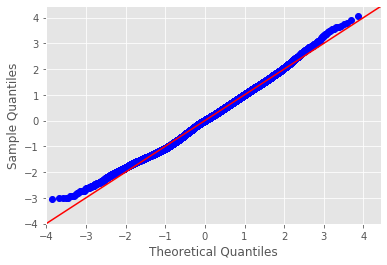

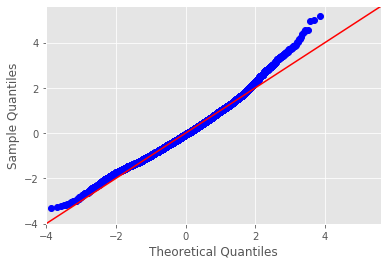

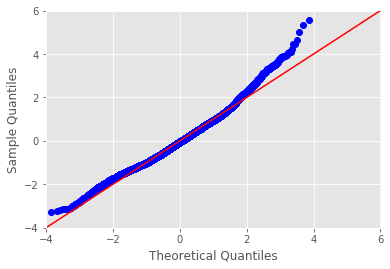

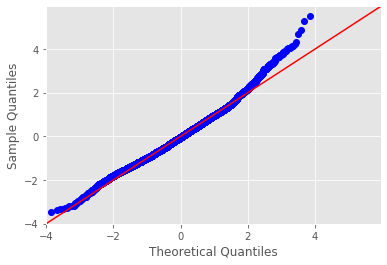

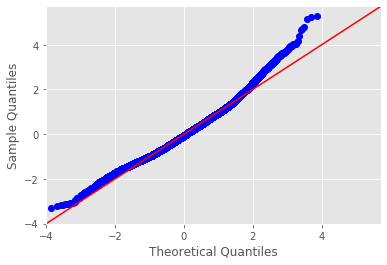

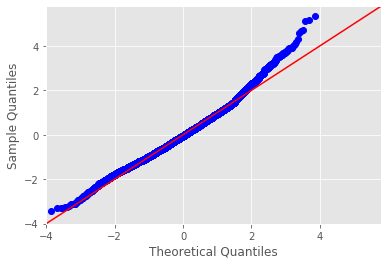

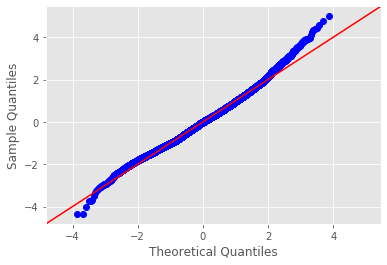

In [137]:
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')


f = 'price~sqft_above'
f2 = 'price~has_basement'
f3 = 'price~home_age'
f4 = 'price~zip_98004'
f5 = 'price~living_lot_ratio'
f6 = 'price~zip_98188'
f7 = 'price~sqft_living15'

model_01 = smf.ols(formula=f, data=no_high_pvals).fit()
model_02 = smf.ols(formula=f2, data=no_high_pvals).fit()
model_03 = smf.ols(formula=f3, data=no_high_pvals).fit()
model_04 = smf.ols(formula=f4, data=no_high_pvals).fit()
model_05 = smf.ols(formula=f5, data=no_high_pvals).fit()
model_06 = smf.ols(formula=f6, data=no_high_pvals).fit()
model_07 = smf.ols(formula=f7, data=no_high_pvals).fit()

resid1 = model_01.resid
resid2 = model_02.resid
resid3 = model_03.resid
resid4 = model_04.resid
resid5 = model_05.resid
resid6 = model_06.resid
resid7 = model_07.resid

fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid3, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid4, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid5, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid6, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid7, dist=stats.norm, line='45', fit=True)

Analysis of QQ Plots:
--

It seems that the data is pretty normally distributed, from looking at the QQ plots above. This is good revelation.

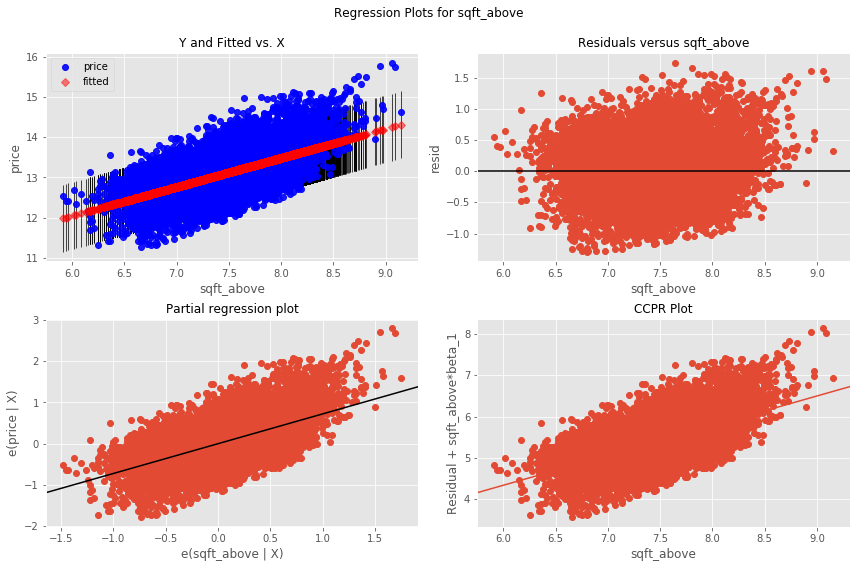

In [140]:
# Residual plotting for sqft_above

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_01, 'sqft_above', fig=fig)

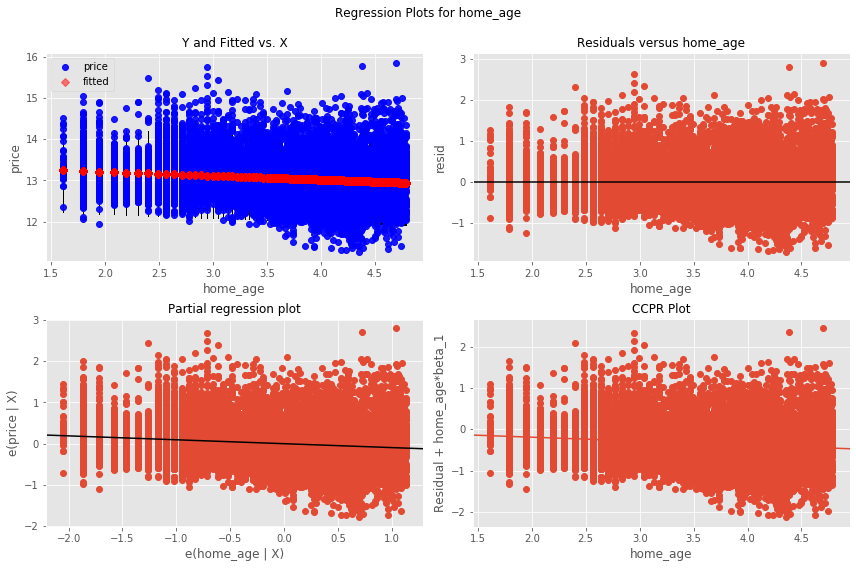

In [142]:
# Residual plotting for the other models.

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_03, 'home_age', fig=fig)

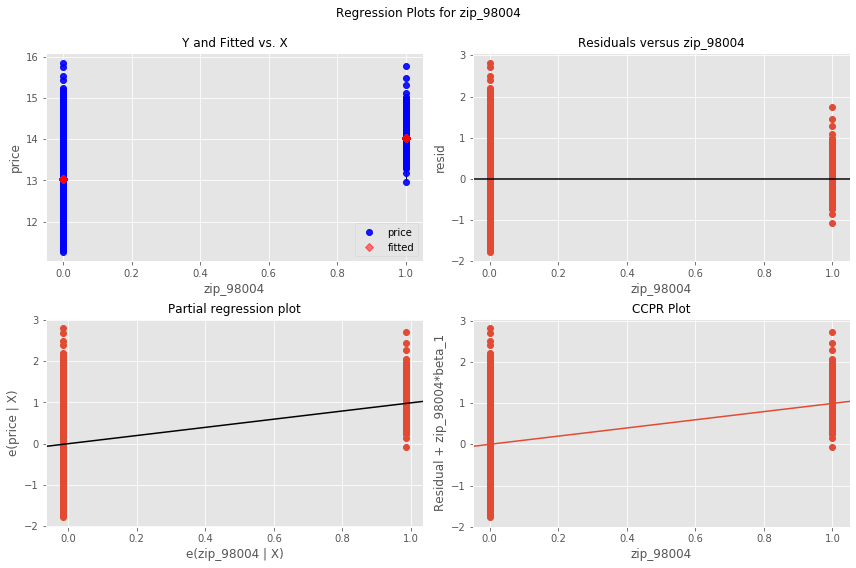

In [143]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_04, 'zip_98004', fig=fig)

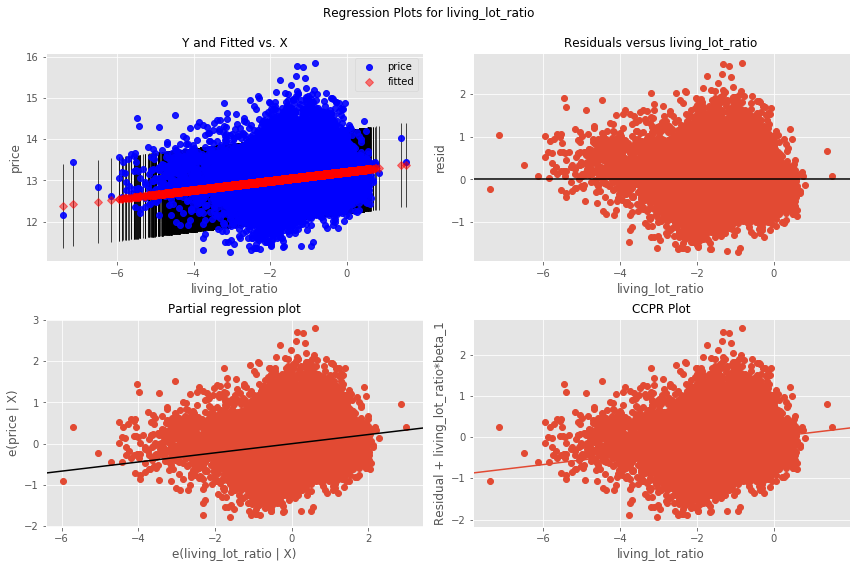

In [144]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_05, 'living_lot_ratio', fig=fig)

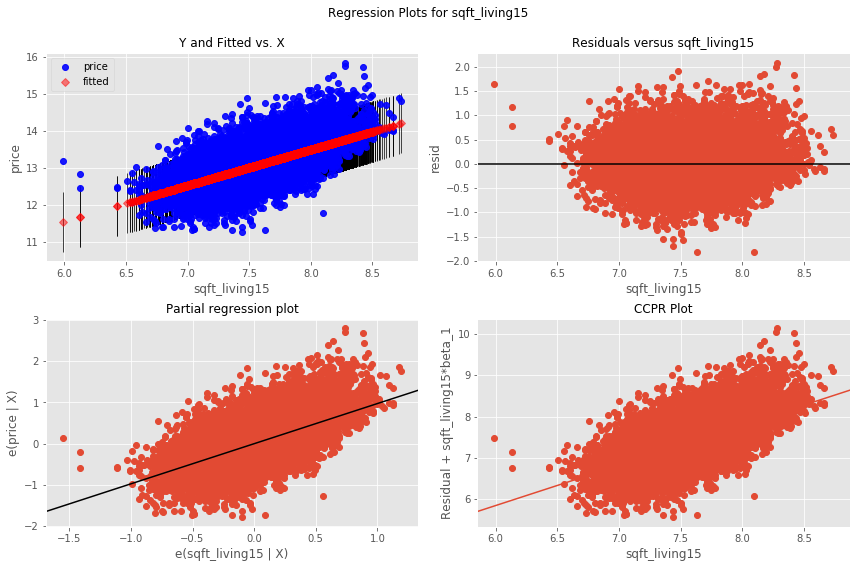

In [145]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_07, 'sqft_living15', fig=fig)

Note Stop: Insights From QQ / Residual Plotting
--

The residual/QQ plots show the following:

- sqft_above has general heteroscedasticity and has a normal distribution
- living_lot_ratio shows homoscedasticity and may be best removed from the model
- sqft_living15 has general heteroscedasticity

In [146]:
# Running another model with living_lot_ratio and home_age removed

no_het = no_high_pvals.drop(['living_lot_ratio','home_age'], axis = 1)

The Final Model For The Training Phase:
--

There's a need to review here what's been done to this train split section of data:

- Target variable 'price' has been log-transformed and scaled
- Sqft_living15, Sqft_above, Home_age, and Living_lot_ratio were log-transformed
- Zipcode dummy variables were fed into the model first
- The bathrooms, sqft_living15, floors, baths_with_reno, has_watefront, home_age and living_lot_ratio variables are not included in the chosen model

In [150]:
include1 = [i for i in no_het if 'zip' in i]
include2 = ['sqft_above','has_basement']

outcome3 = 'price'
predictors3 = no_het.drop('price',axis=1)
pred_sum3 = '+'.join(predictors3[include1+include2])
formula3 = outcome3 + '~' + pred_sum3

model3 = ols(formula=formula3, data=no_het).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1092.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:08:48   Log-Likelihood:                 998.93
No. Observations:               17276   AIC:                            -1860.
Df Residuals:                   17207   BIC:                            -1325.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.9262      0.036    192.603      0.000       6.856       6.997
zip_98003        0.0533      0.017      3.134      0.002       0.020       0.087
zip_98004        1.2486      0.016     77.087      0.000       1.217       1.280
zip_98005        0.8463      0.021     40.557      0.000       0.805       0.887
zip_98006        0.8152      0.014     59.330      0.000       0.788       0.842
zip_98007        0.7202      0.023     31.199      0.000       0.675       0.765
zip_98008        0.7452      0.017     43.802      0.000       0.712       0.779
zip_98010        0.3136      0.027     11.552      0.000       0.260       0.367
zip_98011        0.4677      0.020     23.333      0.000       0.428       0.507
zip_98014        0.3873      0.024     16.215      0.000       0.341       0.434
zip_98019        0.3236      0.021     15.768      0.000       0.283       0.364
zip_98022        0.1501      0.018      8.323      0.000       0.115       0.185
zip_98024        0.5230      0.029     18.053      0.000       0.466       0.580
zip_98027        0.5686      0.015     38.679      0.000       0.540       0.597
zip_98028        0.4435      0.017     26.073      0.000       0.410       0.477
zip_98029        0.6432      0.016     39.419      0.000       0.611       0.675
zip_98030        0.0436      0.018      2.450      0.014       0.009       0.079
zip_98031        0.0971      0.017      5.691      0.000       0.064       0.131
zip_98033        0.8691      0.014     60.671      0.000       0.841       0.897
zip_98034        0.5790      0.013     43.670      0.000       0.553       0.605
zip_98038        0.1706      0.013     13.163      0.000       0.145       0.196
zip_98039        1.5108      0.036     41.669      0.000       1.440       1.582
zip_98040        1.0830      0.017     62.632      0.000       1.049       1.117
zip_98042        0.0898      0.013      6.656      0.000       0.063       0.116
zip_98045        0.3757      0.019     20.004      0.000       0.339       0.412
zip_98052        0.6929      0.013     52.567      0.000       0.667       0.719
zip_98053        0.6435      0.015     43.257      0.000       0.614       0.673
zip_98055        0.1517      0.018      8.537      0.000       0.117       0.186
zip_98056        0.3539      0.015     23.716      0.000       0.325       0.383
zip_98058        0.1959      0.014     13.909      0.000       0.168       0.224
zip_98059        0.3615      0.014     25.749      0.000       0.334       0.389
zip_98065        0.3974      0.017     23.895      0.000       0.365       0.430
zip_98070        0.5719      0.024     23.744      0.000       0.525       0.619
zip_98072        0.5604      0.017     32.422      0.000       0.527       0.594
zip_98074        0.6449      0.014     44.847      0.000       0.617       0.673
zip_9

Re-preparing & Splitting Dataset:
--

Now, it's time to take the dataset from the beginning and apply the changes made to the training dataset, and then to split the dataset, and then to evaluate the training portion of the data once more.

In [152]:
# To-do list for the dataset

df.head()

# Change 'price' with log-transform and scaling
# Log-transform for sqft_above and sqft_living15
# Remove baths_with_reno, floors, bathrooms, has_waterfront and bedrooms

,price,has_waterfront,sqft_above,has_basement,sqft_living15,home_age,living_lot_ratio,zip_98002,zip_98003,zip_98004,...,bwr_5_5,bwr_5_75,bwr_6_0,bwr_6_25,bwr_6_5,bwr_6_75,bwr_7_5,bwr_7_75,bwr_8_0,bwr_9_0
0,221900.0,0,1180,0,1340,65,0.208850,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,0,2170,1,1690,69,0.354874,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,0,770,0,2720,87,0.077000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0,1050,1,1360,55,0.392000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,0,1680,0,1800,33,0.207921,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
newdf = df.drop(['has_waterfront'], axis = 1)
#newdf

In [159]:
#newdf = newdf.drop([i for i in df if 'bwr' in i], axis=1)

In [163]:
#newdf = newdf.drop([i for i in df if 'baths' in i], axis=1)

In [165]:
#newdf = newdf.drop([i for i in df if 'beds' in i], axis=1)

In [167]:
#newdf = newdf.drop([i for i in df if 'floors' in i], axis=1)

In [169]:
# Log-transform of sqft_living15, sqft_above and the target variable price

x_cols = ['sqft_living15','sqft_above','price']
for feat in x_cols:
    newdf[feat] = newdf[feat].map(lambda x: np.log(x))

In [171]:
newdf

,price,sqft_above,has_basement,sqft_living15,home_age,living_lot_ratio,zip_98002,zip_98003,zip_98004,zip_98005,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,12.309982,7.073270,0,7.200425,65,0.208850,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,13.195614,7.682482,1,7.432484,69,0.354874,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.100712,6.646391,0,7.908387,87,0.077000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13.311329,6.956545,1,7.215240,55,0.392000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13.142166,7.426549,0,7.495542,33,0.207921,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,12.793859,7.333023,0,7.333023,11,1.352785,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21592,12.899220,7.745003,0,7.512071,6,0.397385,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21593,12.904459,6.927558,0,6.927558,11,0.755556,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21594,12.899220,7.377759,0,7.251345,16,0.670017,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
new_train, new_test = train_test_split(newdf, test_size=0.2)

In [178]:
outcome = 'price'
predictors = new_train.drop('price',axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [179]:
model = ols(formula=formula, data=new_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1163.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:59:16   Log-Likelihood:                 2075.6
No. Observations:               17276   AIC:                            -4001.
Df Residuals:                   17201   BIC:                            -3419.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.6162      0.050    111.836      0.000       5.518       5.715
sqft_above           0.6153      0.006     98.872      0.000       0.603       0.627
has_basement         0.1962      0.004     50.792      0.000       0.189       0.204
sqft_living15        0.3109      0.008     37.361      0.000       0.295       0.327
home_age            -0.0002   8.41e-05     -2.039      0.041      -0.000   -6.66e-06
living_lot_ratio    -0.1751      0.009    -19.172      0.000      -0.193      -0.157
zip_98002            0.0100      0.022      0.462      0.644      -0.032       0.052
zip_98003            0.0540      0.019      2.816      0.005       0.016       0.092
zip_98004            1.1892      0.019     62.967      0.000       1.152       1.226
zip_98005            0.7762      0.022     34.513      0.000       0.732       0.820
zip_98006            0.7378      0.017     43.757      0.000       0.705       0.771
zip_98007            0.7071      0.024     29.427      0.000       0.660       0.754
zip_98008            0.7289      0.019     38.227      0.000       0.692       0.766
zip_98010            0.2757      0.026     10.411      0.000       0.224       0.328
zip_98011            0.4217      0.022     19.612      0.000       0.380       0.464
zip_98014            0.3514      0.025     14.094      0.000       0.303       0.400
zip_98019            0.2671      0.022     12.216      0.000       0.224       0.310
zip_98022            0.1241      0.020      6.127      0.000       0.084       0.164
zip_98023           -0.0077      0.017     -0.454      0.650      -0.041       0.025
zip_98024            0.4955      0.030     16.748      0.000       0.438       0.553
zip_98027            0.5493      0.018     31.281      0.000       0.515       0.584
zip_98028            0.4271      0.019     22.141      0.000       0.389       0.465
zip_98029            0.6415      0.019     34.478      0.000       0.605       0.678
zip_98030            0.0401      0.020      2.043      0.041       0.002       0.079
zip_98031            0.0701      0.019      3.629      0.000       0.032       0.108
zip_98032            0.0089      0.024      0.368      0.713      -0.038       0.056
zip_98033            0.8346      0.017     48.476      0.000       0.801       0.868
zip_98034            0.5710      0.016     34.776      0.000       0.539       0.603
zip_98038            0.1511      0.016      9.338      0.000       0.119       0.183
zip_98039            1.4094      0.039     35.961      0.000       1.333       1.486
zip_98040            1.0038      0.020     51.412      0.000       0.965       1.042
zip_98042            0.0754      0.016      4.634      0.000       0.043       0.107
zip_98045            0.3472      0.020     17.023      0.000       0.307       0.387
zip_98052            0.

Evaluating the Model:
--

- an R2 of 0.833 and adjusted R2 is the same
- a few high p-vals for zipcode dummy variables: 98002, 98023, 98032, 98092

In [180]:
# Dropping variables with high p-vals

newdf = newdf.drop(['zip_98002','zip_98023','zip_98032','zip_98092'], axis=1)

In [181]:
new_train, new_test = train_test_split(newdf, test_size=0.2)

In [183]:
outcome = 'price'
predictors = new_train.drop('price',axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=new_train).fit()
#model.summary()

In [184]:
newdf = newdf.drop('home_age', axis=1)

In [185]:
new_train, new_test = train_test_split(newdf, test_size=0.2)

In [187]:
outcome = 'price'
predictors = new_train.drop('price',axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=new_train).fit()
#model.summary()

In [188]:
newdf = newdf.drop('zip_98030', axis=1)

In [189]:
new_train, new_test = train_test_split(newdf, test_size=0.2)

In [191]:
# The final-final model

outcome = 'price'
predictors = new_train.drop('price',axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=new_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     1262.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:09:12   Log-Likelihood:                 1958.2
No. Observations:               17276   AIC:                            -3778.
Df Residuals:                   17207   BIC:                            -3243.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.5637      0.047    119.634      0.000       5.473       5.655
sqft_above           0.6246      0.006    101.037      0.000       0.612       0.637
has_basement         0.1951      0.004     50.239      0.000       0.187       0.203
sqft_living15        0.3087      0.008     37.263      0.000       0.292       0.325
living_lot_ratio    -0.1635      0.008    -21.653      0.000      -0.178      -0.149
zip_98003            0.0337      0.016      2.102      0.036       0.002       0.065
zip_98004            1.1691      0.015     78.636      0.000       1.140       1.198
zip_98005            0.7538      0.020     38.587      0.000       0.716       0.792
zip_98006            0.7262      0.013     57.769      0.000       0.702       0.751
zip_98007            0.6671      0.021     31.393      0.000       0.625       0.709
zip_98008            0.7200      0.015     47.202      0.000       0.690       0.750
zip_98010            0.2827      0.025     11.428      0.000       0.234       0.331
zip_98011            0.4111      0.018     22.663      0.000       0.376       0.447
zip_98014            0.3446      0.023     14.928      0.000       0.299       0.390
zip_98019            0.2880      0.019     15.395      0.000       0.251       0.325
zip_98022            0.1107      0.017      6.444      0.000       0.077       0.144
zip_98024            0.4781      0.027     17.393      0.000       0.424       0.532
zip_98027            0.5303      0.013     40.264      0.000       0.504       0.556
zip_98028            0.4105      0.015     27.148      0.000       0.381       0.440
zip_98029            0.6312      0.015     43.426      0.000       0.603       0.660
zip_98031            0.0625      0.016      3.931      0.000       0.031       0.094
zip_98033            0.8189      0.013     62.687      0.000       0.793       0.844
zip_98034            0.5606      0.012     47.875      0.000       0.538       0.584
zip_98038            0.1433      0.011     12.516      0.000       0.121       0.166
zip_98039            1.4069      0.035     40.359      0.000       1.339       1.475
zip_98040            0.9927      0.016     63.438      0.000       0.962       1.023
zip_98042            0.0591      0.012      4.993      0.000       0.036       0.082
zip_98045            0.3579      0.017     20.676      0.000       0.324       0.392
zip_98052            0.6383      0.012     54.711      0.000       0.615       0.661
zip_98053            0.5863      0.013     44.041      0.000       0.560       0.612
zip_98055            0.1470      0.016      9.279      0.000       0.116       0.178
zip_98056            0.3478      0.013     26.058      0.000       0.322       0.374
zip_98058            0.1599      0.013     12.696      0.000       0.135       0.185
zip_98059            0.

In [198]:
#on training data

from sklearn.metrics import r2_score

true_value = new_train['price']
features = new_train.drop('price',axis=1)
predicted_val = model.predict(features)
accuracy = r2_score(true_value,predicted_val)

accuracy

0.832941392210927

In [199]:
#on test data

true_value2 = new_test['price']
features2 = new_test.drop('price', axis = 1)
predicted_val2 = model.predict(features2)
accuracy2 = r2_score(true_value2, predicted_val2)
accuracy2

0.8412116104280266

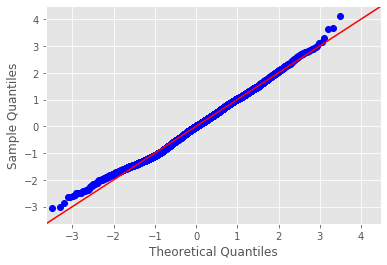

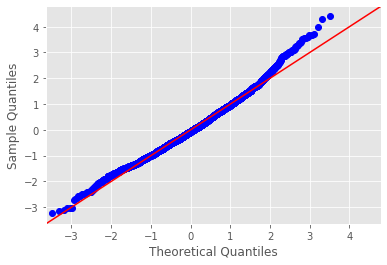

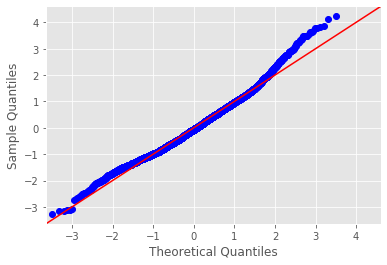

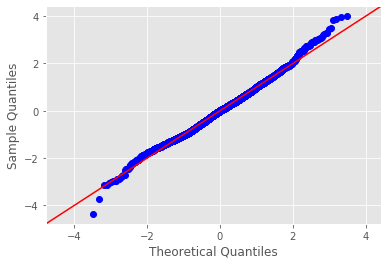

In [213]:
plt.style.use('ggplot')


f = 'price~sqft_above'
f2 = 'price~has_basement'
f3 = 'price~living_lot_ratio'
f4 = 'price~sqft_living15'

model_01_test = smf.ols(formula=f, data=new_test).fit()
model_02_test = smf.ols(formula=f2, data=new_test).fit()
model_03_test = smf.ols(formula=f3, data=new_test).fit()
model_04_test = smf.ols(formula=f4, data=new_test).fit()

resid1_test = model_01.resid
resid2_test = model_02.resid
resid3_test = model_03.resid
resid4_test = model_04.resid

fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid3, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid4, dist=stats.norm, line='45', fit=True)

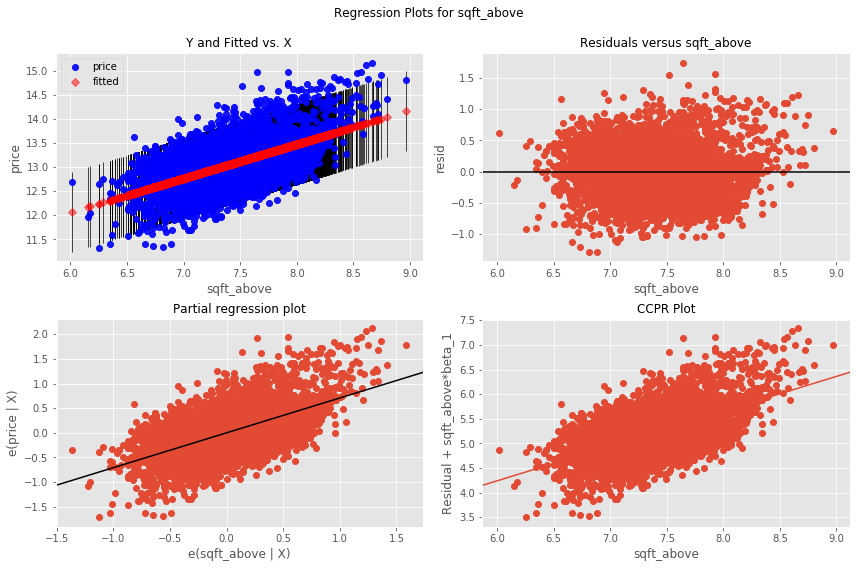

In [214]:
# Residual plots for variables other than zipcode dummies
# Sqft_above (test)

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_01_test, 'sqft_above', fig=fig)

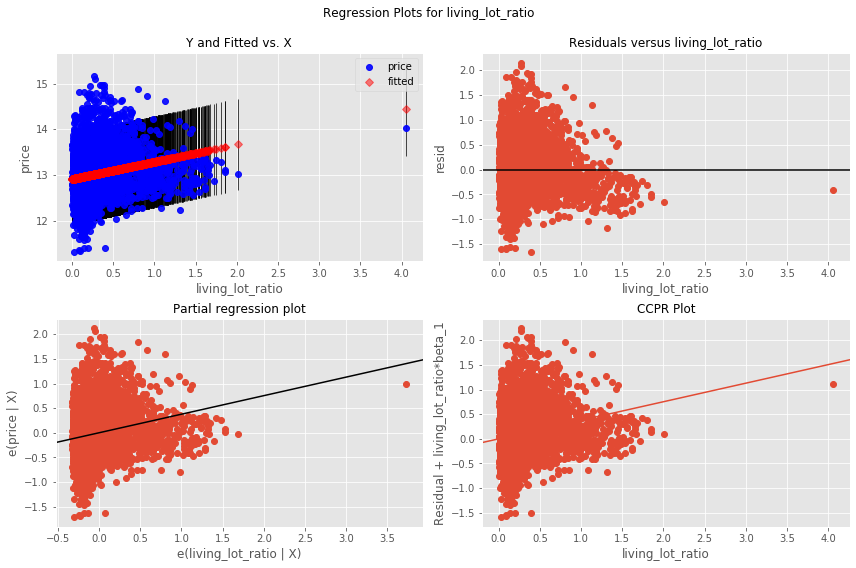

In [215]:
# Living-lot-ratio (test)

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_03_test, 'living_lot_ratio', fig=fig)

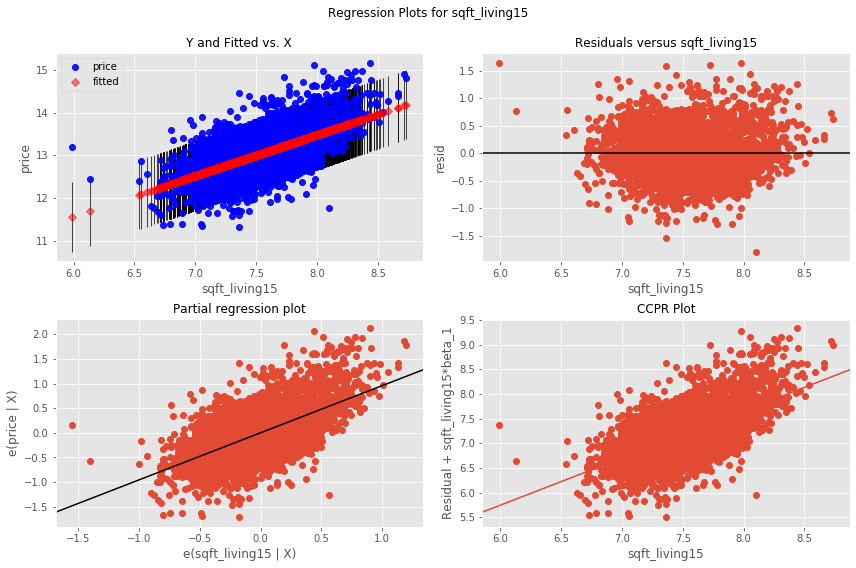

In [217]:
# Sqft_living15 (test)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_04_test, 'sqft_living15', fig=fig)

Final Model: Completed
--

So, here's the final model!

The following will show a journey to "fitting" the model to the test set (just for fun).

In [219]:
# Will drop living_lot_ratio due to homoscedasticity
newdf = newdf.drop('living_lot_ratio', axis=1)

In [220]:
new_train, new_test = train_test_split(newdf, test_size=0.2)

In [222]:
outcome = 'price'
predictors = new_test.drop('price',axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=new_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     307.7
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:57:19   Log-Likelihood:                 523.56
No. Observations:                4320   AIC:                            -911.1
Df Residuals:                    4252   BIC:                            -477.9
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.5793      0.092     60.357      0.000       5.398       5.761
sqft_above        0.5730      0.012     46.785      0.000       0.549       0.597
has_basement      0.1784      0.008     22.917      0.000       0.163       0.194
sqft_living15     0.3531      0.017     21.170      0.000       0.320       0.386
zip_98003         0.0065      0.030      0.220      0.826      -0.052       0.065
zip_98004         1.1540      0.031     36.646      0.000       1.092       1.216
zip_98005         0.7388      0.038     19.460      0.000       0.664       0.813
zip_98006         0.7377      0.025     29.322      0.000       0.688       0.787
zip_98007         0.6403      0.046     13.785      0.000       0.549       0.731
zip_98008         0.6922      0.031     21.992      0.000       0.631       0.754
zip_98010         0.2822      0.046      6.081      0.000       0.191       0.373
zip_98011         0.4051      0.039     10.450      0.000       0.329       0.481
zip_98014         0.3849      0.040      9.671      0.000       0.307       0.463
zip_98019         0.2756      0.035      7.916      0.000       0.207       0.344
zip_98022         0.1741      0.036      4.790      0.000       0.103       0.245
zip_98024         0.4133      0.055      7.490      0.000       0.305       0.522
zip_98027         0.4872      0.027     18.149      0.000       0.435       0.540
zip_98028         0.3956      0.031     12.757      0.000       0.335       0.456
zip_98029         0.5811      0.030     19.273      0.000       0.522       0.640
zip_98031         0.0741      0.031      2.376      0.018       0.013       0.135
zip_98033         0.8140      0.027     30.051      0.000       0.761       0.867
zip_98034         0.5496      0.024     22.773      0.000       0.502       0.597
zip_98038         0.1100      0.022      5.014      0.000       0.067       0.153
zip_98039         1.3822      0.083     16.738      0.000       1.220       1.544
zip_98040         0.9326      0.032     29.424      0.000       0.870       0.995
zip_98042         0.0666      0.023      2.842      0.005       0.021       0.113
zip_98045         0.3377      0.036      9.501      0.000       0.268       0.407
zip_98052         0.6165      0.024     26.198      0.000       0.570       0.663
zip_98053         0.5787      0.026     22.341      0.000       0.528       0.629
zip_98055         0.1613      0.029      5.594      0.000       0.105       0.218
zip_98056         0.3846      0.028     13.595      0.000       0.329       0.440
zip_98058         0.1935      0.025      7.859      0.000       0.145       0.242
zip_98059         0.3269      0.024     13.511      0.000       0.279       0.374
zip_98065         0.3434      0.030     11.522      0.000       0.285       0.402
zip_98070         0.5340      0.043     12.399   

In [223]:
# 98188, 98168, 98003
newdf = newdf.drop('zip_98188', axis=1)
newdf = newdf.drop('zip_98168', axis=1)
newdf = newdf.drop('zip_98003', axis=1)

In [224]:
new_train, new_test = train_test_split(newdf, test_size=0.2)

In [225]:
outcome = 'price'
predictors = new_test.drop('price',axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=new_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     330.2
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:59:51   Log-Likelihood:                 458.94
No. Observations:                4320   AIC:                            -787.9
Df Residuals:                    4255   BIC:                            -373.8
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.6493      0.095     59.326      0.000       5.463       5.836
sqft_above        0.5893      0.012     48.710      0.000       0.566       0.613
has_basement      0.1861      0.008     23.918      0.000       0.171       0.201
sqft_living15     0.3304      0.017     19.713      0.000       0.298       0.363
zip_98004         1.1207      0.027     40.956      0.000       1.067       1.174
zip_98005         0.7553      0.041     18.203      0.000       0.674       0.837
zip_98006         0.7042      0.026     27.354      0.000       0.654       0.755
zip_98007         0.6441      0.042     15.358      0.000       0.562       0.726
zip_98008         0.6677      0.032     21.046      0.000       0.606       0.730
zip_98010         0.2306      0.051      4.498      0.000       0.130       0.331
zip_98011         0.4093      0.035     11.835      0.000       0.341       0.477
zip_98014         0.4130      0.050      8.254      0.000       0.315       0.511
zip_98019         0.2163      0.038      5.709      0.000       0.142       0.291
zip_98022         0.1039      0.036      2.917      0.004       0.034       0.174
zip_98024         0.5028      0.049     10.283      0.000       0.407       0.599
zip_98027         0.4882      0.026     19.078      0.000       0.438       0.538
zip_98028         0.4288      0.037     11.603      0.000       0.356       0.501
zip_98029         0.5827      0.028     20.825      0.000       0.528       0.638
zip_98031         0.0524      0.028      1.848      0.065      -0.003       0.108
zip_98033         0.7828      0.026     30.012      0.000       0.732       0.834
zip_98034         0.5364      0.023     23.375      0.000       0.491       0.581
zip_98038         0.1048      0.022      4.660      0.000       0.061       0.149
zip_98039         1.4248      0.064     22.095      0.000       1.298       1.551
zip_98040         0.9828      0.031     31.633      0.000       0.922       1.044
zip_98042         0.0455      0.024      1.862      0.063      -0.002       0.094
zip_98045         0.3398      0.036      9.316      0.000       0.268       0.411
zip_98052         0.6156      0.024     26.108      0.000       0.569       0.662
zip_98053         0.5450      0.029     18.989      0.000       0.489       0.601
zip_98055         0.1243      0.031      3.960      0.000       0.063       0.186
zip_98056         0.3385      0.028     12.178      0.000       0.284       0.393
zip_98058         0.1438      0.026      5.472      0.000       0.092       0.195
zip_98059         0.2632      0.025     10.528      0.000       0.214       0.312
zip_98065         0.3220      0.031     10.260      0.000       0.260       0.384
zip_98070         0.4863      0.059      8.184      0.000       0.370       0.603
zip_98072         0.4510      0.034     13.397   

In [226]:
# 98042, 98031
newdf = newdf.drop('zip_98042', axis=1)
newdf = newdf.drop('zip_98031', axis=1)

In [227]:
new_train, new_test = train_test_split(newdf, test_size=0.2)

In [228]:
outcome = 'price'
predictors = new_test.drop('price',axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=new_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     344.8
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:01:39   Log-Likelihood:                 537.06
No. Observations:                4320   AIC:                            -948.1
Df Residuals:                    4257   BIC:                            -546.7
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.6935      0.092     62.140      0.000       5.514       5.873
sqft_above        0.5657      0.012     47.177      0.000       0.542       0.589
has_basement      0.1821      0.008     24.005      0.000       0.167       0.197
sqft_living15     0.3492      0.016     21.283      0.000       0.317       0.381
zip_98004         1.1342      0.029     39.101      0.000       1.077       1.191
zip_98005         0.7473      0.040     18.770      0.000       0.669       0.825
zip_98006         0.6921      0.024     28.491      0.000       0.644       0.740
zip_98007         0.6277      0.046     13.742      0.000       0.538       0.717
zip_98008         0.6954      0.029     23.877      0.000       0.638       0.752
zip_98010         0.2732      0.047      5.853      0.000       0.182       0.365
zip_98011         0.3768      0.036     10.583      0.000       0.307       0.447
zip_98014         0.2895      0.044      6.595      0.000       0.203       0.376
zip_98019         0.2650      0.034      7.804      0.000       0.198       0.332
zip_98022         0.1021      0.029      3.490      0.000       0.045       0.159
zip_98024         0.4454      0.077      5.816      0.000       0.295       0.596
zip_98027         0.4921      0.026     18.864      0.000       0.441       0.543
zip_98028         0.3845      0.028     13.704      0.000       0.329       0.440
zip_98029         0.5500      0.027     20.189      0.000       0.497       0.603
zip_98033         0.8354      0.025     33.779      0.000       0.787       0.884
zip_98034         0.5112      0.021     23.870      0.000       0.469       0.553
zip_98038         0.1074      0.021      5.042      0.000       0.066       0.149
zip_98039         1.3940      0.066     21.193      0.000       1.265       1.523
zip_98040         0.9511      0.029     32.845      0.000       0.894       1.008
zip_98045         0.3268      0.036      9.201      0.000       0.257       0.396
zip_98052         0.5865      0.023     25.097      0.000       0.541       0.632
zip_98053         0.5103      0.026     19.441      0.000       0.459       0.562
zip_98055         0.1194      0.031      3.880      0.000       0.059       0.180
zip_98056         0.3006      0.026     11.656      0.000       0.250       0.351
zip_98058         0.1709      0.024      7.063      0.000       0.123       0.218
zip_98059         0.3145      0.024     13.103      0.000       0.267       0.362
zip_98065         0.2894      0.027     10.549      0.000       0.236       0.343
zip_98070         0.4588      0.051      8.920      0.000       0.358       0.560
zip_98072         0.4698      0.034     13.930      0.000       0.404       0.536
zip_98074         0.5731      0.024     23.583      0.000       0.525       0.621
zip_98075         0.5485      0.028     19.919   

In [229]:
# 98148, 98198
newdf = newdf.drop('zip_98148', axis=1)
newdf = newdf.drop('zip_98198', axis=1)

In [230]:
new_train, new_test = train_test_split(newdf, test_size=0.2)

In [231]:
outcome = 'price'
predictors = new_test.drop('price',axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=new_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     324.9
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:02:45   Log-Likelihood:                 416.17
No. Observations:                4320   AIC:                            -710.3
Df Residuals:                    4259   BIC:                            -321.7
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.6736      0.094     60.336      0.000       5.489       5.858
sqft_above        0.5807      0.012     47.327      0.000       0.557       0.605
has_basement      0.1750      0.008     22.228      0.000       0.160       0.190
sqft_living15     0.3375      0.017     20.112      0.000       0.305       0.370
zip_98004         1.1104      0.030     37.429      0.000       1.052       1.169
zip_98005         0.7246      0.038     18.822      0.000       0.649       0.800
zip_98006         0.6359      0.024     25.985      0.000       0.588       0.684
zip_98007         0.6214      0.041     15.049      0.000       0.540       0.702
zip_98008         0.6591      0.029     22.423      0.000       0.602       0.717
zip_98010         0.2200      0.051      4.275      0.000       0.119       0.321
zip_98011         0.3832      0.036     10.607      0.000       0.312       0.454
zip_98014         0.4019      0.041      9.728      0.000       0.321       0.483
zip_98019         0.2379      0.039      6.114      0.000       0.162       0.314
zip_98022         0.1197      0.034      3.552      0.000       0.054       0.186
zip_98024         0.4508      0.050      8.965      0.000       0.352       0.549
zip_98027         0.4582      0.025     18.154      0.000       0.409       0.508
zip_98028         0.4042      0.034     11.981      0.000       0.338       0.470
zip_98029         0.5699      0.030     18.735      0.000       0.510       0.630
zip_98033         0.7742      0.026     29.993      0.000       0.724       0.825
zip_98034         0.5286      0.023     23.441      0.000       0.484       0.573
zip_98038         0.1303      0.022      5.892      0.000       0.087       0.174
zip_98039         1.3213      0.111     11.879      0.000       1.103       1.539
zip_98040         0.9554      0.030     31.577      0.000       0.896       1.015
zip_98045         0.3336      0.033     10.098      0.000       0.269       0.398
zip_98052         0.5972      0.023     25.965      0.000       0.552       0.642
zip_98053         0.5325      0.027     19.930      0.000       0.480       0.585
zip_98055         0.1062      0.031      3.398      0.001       0.045       0.167
zip_98056         0.3319      0.026     12.708      0.000       0.281       0.383
zip_98058         0.1530      0.025      6.140      0.000       0.104       0.202
zip_98059         0.2770      0.024     11.503      0.000       0.230       0.324
zip_98065         0.3191      0.029     10.926      0.000       0.262       0.376
zip_98070         0.4134      0.049      8.432      0.000       0.317       0.509
zip_98072         0.4447      0.029     15.209      0.000       0.387       0.502
zip_98074         0.5139      0.024     21.189      0.000       0.466       0.561
zip_98075         0.5158      0.027     19.066   